In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [ ]:
!pip install nltk

In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as stat

In [ ]:
import nltk
nltk.data.path.append("~/nltk_data")
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.data.path.append("~/nltk_data")
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '~/nltk_data', '~/nltk_data']


In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Basic Feature Extraction

In [ ]:
train = pd.read_csv('/content/stock_tweets.csv')

In [ ]:
# Replace 'your_dataset.csv' with the actual path to your dataset file
dataset = pd.read_csv('stock_tweets.csv')

In [ ]:
train.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'train'
# and you want to drop rows with values other than 'TSLA' in the 'Stock Name' column

# Filter rows where 'Stock Name' is 'TSLA'
train = train[train['Stock Name'] == 'TSLA']

# Now, 'filtered_train' contains only rows with 'TSLA' in the 'Stock Name' column

In [ ]:
# import pandas as pd

# # Assuming you have a DataFrame named 'train'
# # and you want to drop rows with values other than 'TSLA' in the 'Stock Name' column

# # Filter rows where 'Stock Name' is 'TSLA'
# dataset = dataset[dataset['Stock Name'] == 'TSLA']

# # Now, 'filtered_train' contains only rows with 'TSLA' in the 'Stock Name' column

In [ ]:
train.shape

(37422, 4)

## Handling User Mentions and Hashtags:

In [ ]:
import re

# Define functions to extract user mentions and hashtags
def extract_user_mentions(text):
    # Use regex to find user mentions (e.g., @username)
    user_mentions = re.findall(r'@(\w+)', text)
    return user_mentions

def extract_hashtags(text):
    # Use regex to find hashtags (e.g., #topic)
    hashtags = re.findall(r'#(\w+)', text)
    return hashtags

# Apply the functions to the 'body' column
train['user_mentions'] = train['Tweet'].apply(extract_user_mentions)
train['hashtags'] = train['Tweet'].apply(extract_hashtags)

In [ ]:
train.head()

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",[Tesla],[]
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",[],[]
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",[],[]
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.","[RealDanODowd, WholeMarsBlog, Tesla]",[]
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[]


## Expand Contractions

In [ ]:
# Define a dictionary of common contractions and their expansions
contraction_dict = {
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he's": "he is",
    "he'll": "he will",
    "he'd": "he would",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it's": "it is",
    "let's": "let us",
    "mustn't": "must not",
    "shan't": "shall not",
    "she's": "she is",
    "she'll": "she will",
    "she'd": "she would",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they're": "they are",
    "they'll": "they will",
    "they'd": "they would",
    "wasn't": "was not",
    "we're": "we are",
    "we'll": "we will",
    "we'd": "we would",
    "weren't": "were not",
    "what's": "what is",
    "won't": "will not",
    "wouldn't": "would not",
    "you're": "you are",
    "you'll": "you will",
    "you'd": "you would",
    # Add more contractions and expansions as needed
}

# Define a function to expand contractions using the dictionary
def expand_contractions_manual(text):
    words = text.split()
    expanded_words = [contraction_dict[word] if word in contraction_dict else word for word in words]
    return ' '.join(expanded_words)

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(expand_contractions_manual)

In [ ]:
train.head()

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",[Tesla],[]
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",[],[]
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",[],[]
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.","[RealDanODowd, WholeMarsBlog, Tesla]",[]
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[]


## Lower Case

In [ ]:
train['Tweet'] = train['Tweet'].str.lower()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37422 entries, 0 to 37421
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           37422 non-null  object
 1   Tweet          37422 non-null  object
 2   Stock Name     37422 non-null  object
 3   Company Name   37422 non-null  object
 4   user_mentions  37422 non-null  object
 5   hashtags       37422 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


In [ ]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags
2410,2022-08-28 00:30:15+00:00,4/ it is really insane to think about the numb...,TSLA,"Tesla, Inc.",[],[]
37004,2021-10-04 13:53:50+00:00,everything is red but beautiful $tsla,TSLA,"Tesla, Inc.",[],[]
26754,2021-12-29 12:42:39+00:00,the more gordy comes on @squawkcnbc and pontif...,TSLA,"Tesla, Inc.",[SquawkCNBC],[]
28935,2021-12-07 21:11:26+00:00,highest after dan ives's $1800 bull case targe...,TSLA,"Tesla, Inc.",[],[]
19478,2022-03-06 08:34:06+00:00,@tesla i remember like it was yesterday ❤️ htt...,TSLA,"Tesla, Inc.",[Tesla],[]
24958,2022-01-11 14:11:29+00:00,my prediction today is that $tsla sees some pr...,TSLA,"Tesla, Inc.",[],[]
19761,2022-03-02 16:07:28+00:00,tesla is reaching out to model y owners seeing...,TSLA,"Tesla, Inc.",[],[]
13495,2022-04-28 23:32:36+00:00,could we get the tesla software to better reco...,TSLA,"Tesla, Inc.","[Tesla, elonmusk, Teslarati, JaneidyEve]",[]
6017,2022-07-20 20:50:21+00:00,$tsla q2 earnings: 2022: $16.9 billion 2021: $...,TSLA,"Tesla, Inc.",[],[]
35132,2021-10-21 15:31:28+00:00,there are too many $tsla price increases &amp;...,TSLA,"Tesla, Inc.",[],[]


## Removing punctuations

In [ ]:
import pandas as pd
import re

# Assuming you have a DataFrame 'train' with a column 'text' containing text data
# Replace 'text' with the actual column name in your dataset

# Define a function to remove punctuation from a text string
def remove_punctuation(text):
    # Use regex to remove all non-alphanumeric characters (including punctuation)
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(remove_punctuation)

In [ ]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags
11583,2022-05-17 19:38:12+00:00,for example spy googl tsla,TSLA,"Tesla, Inc.",[],[]
18528,2022-03-18 03:30:28+00:00,cant wait to visit the giga austin factory on ...,TSLA,"Tesla, Inc.","[tesla, elonmusk]",[]
28471,2021-12-13 03:35:06+00:00,imagine being a youtuber for a living and tell...,TSLA,"Tesla, Inc.","[elonmusk, Tesla]",[]
31446,2021-11-12 18:58:14+00:00,amzn rivn we would like 100k cars rivian okay ...,TSLA,"Tesla, Inc.",[],[]
25348,2022-01-07 17:20:14+00:00,yet more bullish news for tesla in 2022 semi ...,TSLA,"Tesla, Inc.",[heydave7],"[Tesla, Rivian]"
26022,2022-01-03 14:51:55+00:00,morgan stanley on teslas 4q delivery numbers t...,TSLA,"Tesla, Inc.",[],[]
27100,2021-12-26 04:51:18+00:00,when most people see a yellow light they start...,TSLA,"Tesla, Inc.",[elonmusk],[]
9430,2022-06-05 15:44:16+00:00,if you are not excited about tsla and spacex e...,TSLA,"Tesla, Inc.",[elonmusk],[]
6635,2022-07-13 15:34:47+00:00,tesla dog mode is amazing its literally one of...,TSLA,"Tesla, Inc.",[Tesla],[]
4874,2022-08-02 21:33:04+00:00,gigaberlinbrandenburg march 2020 sand and noth...,TSLA,"Tesla, Inc.",[Tesla],"[GigaBerlinBrandenburg, Model3, ModelY]"


## Removig Special Characters

In [ ]:
import pandas as pd
import re

# Assuming you have a DataFrame 'train' with a column 'text' containing text data
# Replace 'text' with the actual column name in your dataset

# Define a function to remove special characters from a text string
def remove_special_characters(text):
    # Use regex to remove all non-alphanumeric characters (including special characters)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(remove_special_characters)

In [ ]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags
13170,2022-05-01 15:46:34+00:00,tsla forward pe multiple at it is lowest level...,TSLA,"Tesla, Inc.",[],[]
16248,2022-04-07 22:31:02+00:00,tesla almost went bankrupt four years ago and ...,TSLA,"Tesla, Inc.","[tesla, tesla]",[]
2042,2022-09-01 20:10:05+00:00,what the hell just happened tsla tesla httpstc...,TSLA,"Tesla, Inc.",[],[Tesla]
29380,2021-12-03 17:56:08+00:00,on any other day if i told you 10yrty 66bp to ...,TSLA,"Tesla, Inc.",[elonmusk],[]
21566,2022-02-08 12:47:10+00:00,even the dude with sign says it tsla httpstco...,TSLA,"Tesla, Inc.",[],[]
16325,2022-04-07 13:54:31+00:00,happy cyber rodeo day tesla httpstcobweomcw4bs,TSLA,"Tesla, Inc.",[Tesla],[]
5350,2022-07-27 17:05:18+00:00,tested 2022 mercedesamg eqs 4matic vs 2021 tes...,TSLA,"Tesla, Inc.","[MercedesAMG, Tesla]",[]
24942,2022-01-11 17:11:36+00:00,it takes a triple phd to predict tsla price in...,TSLA,"Tesla, Inc.",[],[]
34353,2021-10-25 21:49:06+00:00,if you missed tsla i did do not fear there wil...,TSLA,"Tesla, Inc.",[],[]
9118,2022-06-09 08:50:29+00:00,tsla china surprise wow wasnt expecting that n...,TSLA,"Tesla, Inc.",[],[]


## Removing URLs

In [ ]:
import pandas as pd
import re

# Assuming you have a DataFrame 'train' with a column 'text' containing text data
# Replace 'text' with the actual column name in your dataset

# Define a function to remove URLs from a text string
def remove_urls(text):
    # Use regex to remove URLs from the text
    text = re.sub(r'http\S+|www.\S+', '', text)
    return text

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(remove_urls)

## Removing words and digits containing digits

In [ ]:
import pandas as pd
import re

# Assuming you have a DataFrame 'train' with a column 'text' containing text data
# Replace 'text' with the actual column name in your dataset

# Define a function to remove words and digits containing digits from a text string
def remove_words_with_digits(text):
    # Use regex to remove words and digits containing digits from the text
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    return text

# Apply the function to the 'text' column
train['Tweet'] = train['Tweet'].apply(remove_words_with_digits)

In [ ]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags
22677,2022-01-28 00:55:25+00:00,tsla tslaq how it started vs how it is going,TSLA,"Tesla, Inc.",[],[]
8579,2022-06-15 14:19:51+00:00,heres what some of those jira tickets look lik...,TSLA,"Tesla, Inc.",[],[]
32136,2021-11-08 16:44:50+00:00,how to catch big news moves with unusualwhales...,TSLA,"Tesla, Inc.",[unusual_whales],[InvestrLessons]
32362,2021-11-07 16:46:36+00:00,elon loves trapping s and eating them for brea...,TSLA,"Tesla, Inc.",[],[Tesla]
24081,2022-01-19 01:05:54+00:00,it happened in october tesla stock passed sh...,TSLA,"Tesla, Inc.","[Tesla, elonmusk]",[]
12017,2022-05-12 18:27:37+00:00,tsla margin calls have begun,TSLA,"Tesla, Inc.",[],[]
12847,2022-05-05 11:06:33+00:00,as a result of the new financing commitments m...,TSLA,"Tesla, Inc.",[elonmusk],[]
1940,2022-09-02 23:29:27+00:00,news teslas california virtual power plant bet...,TSLA,"Tesla, Inc.","[Tesla, TeslaSolar]",[]
37288,2021-10-01 11:29:32+00:00,tesla weddleandsons same here in litchfield ct...,TSLA,"Tesla, Inc.","[Tesla, weddleandsons]",[]
33520,2021-10-30 15:49:05+00:00,the one year chart on tsla is so beautiful,TSLA,"Tesla, Inc.",[],[]


## Tokenization

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize

# Assuming 'train' is your DataFrame and 'body' is the text column to tokenize
train['tweet_tokens'] = train['Tweet'].apply(word_tokenize)

In [ ]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens
1616,2022-09-08 11:51:07+00:00,remember when cathie wood called for oil afte...,TSLA,"Tesla, Inc.",[],[],"[remember, when, cathie, wood, called, for, oi..."
11292,2022-05-19 23:50:05+00:00,fun fact when elon musk moved to texas jared b...,TSLA,"Tesla, Inc.",[],[],"[fun, fact, when, elon, musk, moved, to, texas..."
16629,2022-04-04 19:48:57+00:00,wait elonmusk when does tsla master plan pt c...,TSLA,"Tesla, Inc.",[elonmusk],[],"[wait, elonmusk, when, does, tsla, master, pla..."
13230,2022-04-30 16:23:16+00:00,i think another reason was to just get it out...,TSLA,"Tesla, Inc.",[garyblack00],[],"[i, think, another, reason, was, to, just, get..."
14928,2022-04-20 11:59:00+00:00,some tsla nongaap eps estimates for tonight st...,TSLA,"Tesla, Inc.","[garyblack00, igm95, TeslaSg, jjhanna2, TroyTe...",[],"[some, tsla, nongaap, eps, estimates, for, ton..."
16397,2022-04-06 21:02:03+00:00,bank of america raises pt on tesla tsla to,TSLA,"Tesla, Inc.",[],[],"[bank, of, america, raises, pt, on, tesla, tsl..."
27749,2021-12-20 08:56:33+00:00,tsla forward pe is and falling if tesla beats...,TSLA,"Tesla, Inc.",[],[Tesla],"[tsla, forward, pe, is, and, falling, if, tesl..."
17449,2022-03-28 13:40:36+00:00,tesla plans to split tsla shares again to make...,TSLA,"Tesla, Inc.",[],[],"[tesla, plans, to, split, tsla, shares, again,..."
33632,2021-10-29 20:21:53+00:00,holy cow what a stream finishing the week up t...,TSLA,"Tesla, Inc.","[EmmetPeppers, heydave7]",[],"[holy, cow, what, a, stream, finishing, the, w..."
32375,2021-11-07 16:13:04+00:00,tesla is extremely highly valued and one could...,TSLA,"Tesla, Inc.",[],[],"[tesla, is, extremely, highly, valued, and, on..."


## Removing Gibberish Words

In [ ]:
import nltk
from nltk.corpus import words

# Download the NLTK words dataset if you haven't already
nltk.download('words')

# Create a set of English words from the NLTK words dataset
english_words = set(words.words())

# Define a function to remove gibberish words from a list of tokens
def remove_gibberish(tokens):
    cleaned_tokens = [token for token in tokens if token.lower() in english_words]
    return cleaned_tokens

# Assuming 'corrected_tweets' is your corrected tweet column
train['tweet_tokens'] = train['tweet_tokens'].apply(remove_gibberish)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


## Stop Word Removal

In [ ]:
import nltk
nltk.data.path.append('/kaggle/working/nltk_data')

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download the WordNet resource
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/n

True

In [ ]:
!mkdir -p /usr/share/nltk_data/corpora
!wget -P /usr/share/nltk_data/corpora/ http://nltk.org/nltk_data/packages/corpora/wordnet.zip
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

--2024-01-04 15:45:14--  http://nltk.org/nltk_data/packages/corpora/wordnet.zip
Resolving nltk.org (nltk.org)... 15.197.142.173, 3.33.152.147
Connecting to nltk.org (nltk.org)|15.197.142.173|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-01-04 15:45:14 ERROR 404: Not Found.

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


In [ ]:
import nltk
from nltk.corpus import stopwords

# Assuming 'train' is your DataFrame and 'body_tokens' is the tokenized column
stop_words = set(stopwords.words('english'))

# Define a function to remove stop words from a list of tokens
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

# Apply the remove_stopwords function to the 'body_tokens' column
train['tweet_tokens'] = train['tweet_tokens'].apply(remove_stopwords)

In [ ]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens
8092,2022-06-22 17:53:10+00:00,welcome to the family neo or should i say the...,TSLA,"Tesla, Inc.","[Tesla, DirtyTesLa, elonmusk]",[],"[welcome, family, neo, say, one]"
22923,2022-01-27 02:27:46+00:00,sometimes it feels like elonmusk doesnt get to...,TSLA,"Tesla, Inc.","[elonmusk, Tesla]",[],"[sometimes, like, doesnt, get, appreciate, tha..."
2575,2022-08-25 19:46:34+00:00,twitter about to get raked over the coals twt...,TSLA,"Tesla, Inc.",[],[],"[twitter, get]"
20388,2022-02-22 23:28:44+00:00,to head you had to only pick stock to buy an...,TSLA,"Tesla, Inc.",[],[],"[head, pick, stock, buy, hold, next, decade, a..."
23672,2022-01-22 19:16:15+00:00,updated prediction for crude oil will trade a...,TSLA,"Tesla, Inc.",[],[oil],"[prediction, crude, oil, trade, share, price, ..."
13283,2022-04-29 21:34:05+00:00,amazing to hear people got margin called on ts...,TSLA,"Tesla, Inc.",[],[],"[amazing, hear, people, got, margin, yesterday..."
15330,2022-04-15 16:51:52+00:00,worlds largest economies us china japan g...,TSLA,"Tesla, Inc.",[elonmusk],[],"[us, china, japan]"
18204,2022-03-22 13:37:42+00:00,history in the making gigaberlin tesla tsla,TSLA,"Tesla, Inc.",[],"[GigaBerlin, tesla]","[history, making]"
22846,2022-01-27 14:32:14+00:00,bought more at tsla,TSLA,"Tesla, Inc.",[],[],[bought]
1251,2022-09-13 16:23:03+00:00,this view coming in never gets old my buddy an...,TSLA,"Tesla, Inc.",[],[],"[view, coming, never, old, buddy, quick, could..."


## Stemming

Stemming is Skipped, because we found Lmmatization is giving more accurate results.

## Lemmatization

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

2024-01-04 15:46:19.479949: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 15:46:19.480041: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 15:46:19.483569: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-04 15:46:19.500860: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-04 15:46:20.889505: W tensorflow/compiler/tf2

In [ ]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [ ]:
def lemmatize_tokens(tokens):
    # Join the tokens into a space-separated string
    text = " ".join(tokens)

    # Process the text using spaCy
    doc = nlp(text)

    # Extract lemmas from spaCy's document object
    lemmas = [token.lemma_ for token in doc]

    return lemmas

In [ ]:
# Assuming you have a DataFrame 'train' with a column 'tokenized_tweets'
# Replace 'tokenized_tweets' with the actual column name in your dataset

train['lemmatized_tweets'] = train['tweet_tokens'].apply(lemmatize_tokens)

In [ ]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets
10885,2022-05-21 15:26:37+00:00,great vision correction here by fsdbeta after...,TSLA,"Tesla, Inc.","[Tesla, elonmusk]",[FSDBeta],"[great, vision, correction, turn, right, road,...","[great, vision, correction, turn, right, road,..."
19802,2022-03-02 03:48:32+00:00,elonmusk buybitcoinffs joebiden very true why ...,TSLA,"Tesla, Inc.","[elonmusk, BuyBitcoinFFS, JoeBiden, tesla]",[],[true],[true]
457,2022-09-23 16:17:36+00:00,my tsla ai day wish is for franz to throw a ba...,TSLA,"Tesla, Inc.",[],[],"[ai, day, wish, throw, ball, bearing, bot, ano...","[ai, day, wish, throw, ball, bear, bot, anothe..."
6160,2022-07-20 13:28:00+00:00,tsla is reporting earnings today will they be ...,TSLA,"Tesla, Inc.",[],[],"[earnings, today, join, discuss]","[earning, today, join, discuss]"
22053,2022-02-02 11:59:53+00:00,i want tsla to end the week above is that hap...,TSLA,"Tesla, Inc.",[],[],"[want, end, week, happening]","[want, end, week, happen]"
18865,2022-03-14 09:27:25+00:00,when tesla implodes it will wipe out a generat...,TSLA,"Tesla, Inc.",[],[],"[wipe, generation, thought, good]","[wipe, generation, think, good]"
7387,2022-07-03 05:10:09+00:00,did you know at tesla none of the scrapped lit...,TSLA,"Tesla, Inc.",[],[],"[know, none, scrapped, go]","[know, none, scrap, go]"
13306,2022-04-29 19:34:02+00:00,to is underway day thanks to tsla next wee...,TSLA,"Tesla, Inc.",[],[],"[underway, day, thanks, next, week, going, cra...","[underway, day, thank, next, week, go, crazy, ..."
33892,2021-10-28 00:58:08+00:00,humans would you buy a tesla ev if you had eno...,TSLA,"Tesla, Inc.",[Tesla],[],"[would, buy, enough, money]","[would, buy, enough, money]"
23623,2022-01-23 13:46:16+00:00,bofa hitting the headlines this weekend with o...,TSLA,"Tesla, Inc.",[YouTube],[],"[weekend, one, top, company, always, yes, wall...","[weekend, one, top, company, always, yes, wall..."


In [ ]:
train[['tweet_tokens','lemmatized_tweets']].sample(10)

,tweet_tokens,lemmatized_tweets
34413,"[news, failure, low, margin, forward, fleet, c...","[news, failure, low, margin, forward, fleet, c..."
27064,"[thanks, getting, time, blast, today]","[thank, get, time, blast, today]"
8715,"[gone, haywire, telling, vehicle, ready, pick,...","[go, haywire, tell, vehicle, ready, pick, have..."
33977,"[break, today]","[break, today]"
36535,"[waiting, enter, good, atmosphere, sun, shinin...","[wait, enter, good, atmosphere, sun, shine, ma..."
37261,"[progress, today, check, well, team, works, to...","[progress, today, check, well, team, work, tog..."
30899,"[needs, stop, us, around, every, damn, day, ge...","[need, stop, we, around, every, damn, day, get..."
6691,"[terrible, close, however, meaningless, get, t...","[terrible, close, however, meaningless, get, t..."
16648,"[id, like, sincerely, sarcastically, thank, sp...","[i, d, like, sincerely, sarcastically, thank, ..."
37236,"[weekend, video, one, favorite, case, long, ti...","[weekend, video, one, favorite, case, long, ti..."


In [ ]:
train.shape

(37422, 8)

## POS Tagging

In [ ]:
import spacy
import pandas as pd

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Perform POS tagging on the tokenized words
train['pos_tags'] = train['lemmatized_tweets'].apply(lambda tokens: [(token.text, token.pos_) for token in nlp(" ".join(tokens))])

train['pos_tags'].sample()

14209    [(model, NOUN), (glass, NOUN)]
Name: pos_tags, dtype: object

In [ ]:
train['pos_tags'].sample(10)

19639    [(new, ADJ), (us, PROPN), (battery, NOUN), (fa...
13135                      [(wisdom, NOUN), (crowd, NOUN)]
20152    [(formal, ADJ), (sec, PROPN), (investigation, ...
9408     [(plan, NOUN), (week, NOUN), (ahead, ADV), (pi...
33475    [(people, NOUN), (drive, VERB), (listen, NOUN)...
28341                          [(almost, ADV), (go, VERB)]
19968    [(post, NOUN), (research, NOUN), (believe, NOU...
34683                                         [(go, VERB)]
23906    [(like, ADP), (today, NOUN), (dead, ADJ), (cat...
35503    [(try, VERB), (create, VERB), (entry, NOUN), (...
Name: pos_tags, dtype: object

## Chunking

In [ ]:
import spacy
import pandas as pd

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Define a custom pattern for NP (Noun Phrase) chunking
def custom_chunking(tags):
    noun_phrases = []
    current_chunk = []
    for token, pos in tags:
        if pos.startswith('N'):
            current_chunk.append(token)
        elif current_chunk:
            noun_phrases.append(current_chunk)
            current_chunk = []
    if current_chunk:
        noun_phrases.append(current_chunk)
    return noun_phrases

In [ ]:
# Apply chunking to the 'pos_tags' column
train['noun_phrases'] = train['pos_tags'].apply(custom_chunking)

In [ ]:
train.head()

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",[Tesla],[],"[media, done, amazing, job, brainwashing, peop...","[medium, do, amazing, job, brainwash, people, ...","[(medium, NOUN), (do, VERB), (amazing, ADJ), (...","[[medium], [job, brainwash, people, today, wor..."
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around from t...,TSLA,"Tesla, Inc.",[],[],"[delivery, around]","[delivery, around]","[(delivery, NOUN), (around, ADP)]",[[delivery]]
2,2022-09-29 23:18:08+00:00,even if i include unvested rsus as of addit...,TSLA,"Tesla, Inc.",[],[],"[even, include, unvested, additional, equity, ...","[even, include, unvested, additional, equity, ...","[(even, ADV), (include, VERB), (unvested, ADJ)...","[[equity], [deal], [tomorrow], [equity]]"
3,2022-09-29 22:40:07+00:00,realdanodowd wholemarsblog tesla hahaha why ar...,TSLA,"Tesla, Inc.","[RealDanODowd, WholeMarsBlog, Tesla]",[],"[still, trying, stop, get, together, make, som...","[still, try, stop, get, together, make, someth...","[(still, ADV), (try, VERB), (stop, VERB), (get...","[[work], [ass, clown]]"
4,2022-09-29 22:27:05+00:00,realdanodowd tesla stop trying to kill kids yo...,TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[],"[stop, trying, kill, sad, deranged, old, man]","[stop, try, kill, sad, derange, old, man]","[(stop, VERB), (try, VERB), (kill, VERB), (sad...","[[derange], [man]]"


In [ ]:
# Convert noun phrases to text
train['noun_phrases_text'] = train['noun_phrases'].apply(lambda phrases: [' '.join([token for token in phrases]) for phrases in phrases])

In [ ]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text
17919,2022-03-23 21:05:13+00:00,growth per year for years is im not saying ...,TSLA,"Tesla, Inc.",[],[],"[growth, per, year, saying, thats, trade, basi...","[growth, per, year, say, that, s, trade, basic...","[(growth, NOUN), (per, ADP), (year, NOUN), (sa...","[[growth], [year], [trade], [compounding]]","[growth, year, trade, compounding]"
10683,2022-05-23 15:36:59+00:00,join me in following tsla to bankruptcy,TSLA,"Tesla, Inc.",[],[],"[join, following, bankruptcy]","[join, follow, bankruptcy]","[(join, VERB), (follow, NOUN), (bankruptcy, NO...","[[follow, bankruptcy]]",[follow bankruptcy]
26217,2022-01-02 18:59:49+00:00,here is my latest tesla forecast thread the tr...,TSLA,"Tesla, Inc.",[heydave7],[],"[latest, forecast, thread, trend, sooner, rele...","[late, forecast, thread, trend, soon, release,...","[(late, ADJ), (forecast, NOUN), (thread, NOUN)...","[[forecast, thread, trend], [record, tonight]]","[forecast thread trend, record tonight]"
36160,2021-10-13 09:43:39+00:00,as soon as tesla insurance is available im swi...,TSLA,"Tesla, Inc.",[],[],"[soon, insurance, available, switching]","[soon, insurance, available, switching]","[(soon, ADV), (insurance, VERB), (available, A...",[[switching]],[switching]
33252,2021-11-01 16:44:37+00:00,tsla now above its ma gained over the last ...,TSLA,"Tesla, Inc.",[elonmusk],[],"[last, month, last, three, consecutive, days, ...","[last, month, last, three, consecutive, day, v...","[(last, ADJ), (month, NOUN), (last, ADJ), (thr...","[[month], [three], [day, volatility, momentum]...","[month, three, day volatility momentum, time, ..."
32166,2021-11-08 14:42:21+00:00,sometimes i think tsla twitter is my actual fa...,TSLA,"Tesla, Inc.",[],[],"[sometimes, think, twitter, actual, family]","[sometimes, think, twitter, actual, family]","[(sometimes, ADV), (think, VERB), (twitter, NO...","[[twitter], [family]]","[twitter, family]"
5416,2022-07-26 16:09:49+00:00,afaik i was only one who urged caution i wont...,TSLA,"Tesla, Inc.",[],[],"[one, caution, wont, chase, stock, earnings, f...","[one, caution, will, not, chase, stock, earnin...","[(one, NUM), (caution, NOUN), (will, AUX), (no...","[[one, caution], [stock], [fact], [earning, bu...","[one caution, stock, fact, earning bump]"
21429,2022-02-09 19:24:43+00:00,tsla consolidating in low volume,TSLA,"Tesla, Inc.",[],[],"[low, volume]","[low, volume]","[(low, ADJ), (volume, NOUN)]",[[volume]],[volume]
31011,2021-11-16 17:38:27+00:00,fun fact tsla has been involved in at least o...,TSLA,"Tesla, Inc.",[],[],"[fun, fact, involved, least, vendor, nonpaymen...","[fun, fact, involve, least, vendor, nonpayment...","[(fun, ADJ), (fact, NOUN), (involve, VERB), (l...","[[fact], [vendor, nonpayment, reason], [inclus...","[fact, vendor nonpayment reason, inclusion]"
35579,2021-10-18 17:49:13+00:00,jim chanos still betting against tsla,TSLA,"Tesla, Inc.",[],[],"[still, betting]","[still, bet]","[(still, ADV), (bet, VERB)]",[],[]


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37422 entries, 0 to 37421
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               37422 non-null  object
 1   Tweet              37422 non-null  object
 2   Stock Name         37422 non-null  object
 3   Company Name       37422 non-null  object
 4   user_mentions      37422 non-null  object
 5   hashtags           37422 non-null  object
 6   tweet_tokens       37422 non-null  object
 7   lemmatized_tweets  37422 non-null  object
 8   pos_tags           37422 non-null  object
 9   noun_phrases       37422 non-null  object
 10  noun_phrases_text  37422 non-null  object
dtypes: object(11)
memory usage: 3.4+ MB


## NER

In [ ]:
# # Define a function to perform NER on text
# def perform_ner(text):
#     doc = nlp(text)
#     ner_results = [(ent.text, ent.label_) for ent in doc.ents]
#     return ner_results

In [ ]:
# # Apply NER to the 'text' column
# train['ner'] = train['Tweet'].apply(perform_ner)

## N-Grams

In [ ]:
import pandas as pd
import nltk
from nltk.util import ngrams

In [ ]:
# Define the desired N-gram order (e.g., 2 for bigrams)
n_gram_order = 2

# Function to extract N-grams from a list of tokens
def extract_ngrams(tokens, n):
    # Check if the sequence is long enough for the desired N-gram order
    if len(tokens) >= n:
        return list(ngrams(tokens, n))
    else:
        return []

In [ ]:
# Apply N-gram extraction to the 'tokenized_text' column
train['bigrams'] = train['lemmatized_tweets'].apply(lambda x: extract_ngrams(x, n_gram_order))

In [ ]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams
10926,2022-05-21 10:12:14+00:00,mjuaesensei tesla elonmusk the fact this is...,TSLA,"Tesla, Inc.","[BfloSoldier85, MJ_UAE_sensei, Holtmoney51, Mj...",[],"[fact, legal, goes, show, car, safety]","[fact, legal, go, show, car, safety]","[(fact, NOUN), (legal, ADJ), (go, NOUN), (show...","[[fact], [go], [car, safety]]","[fact, go, car safety]","[(fact, legal), (legal, go), (go, show), (show..."
2689,2022-08-25 03:06:19+00:00,who wants my setup for tomorrow spy tsla vix qqq,TSLA,"Tesla, Inc.",[],[1],"[setup, tomorrow, spy]","[setup, tomorrow, spy]","[(setup, NOUN), (tomorrow, NOUN), (spy, NOUN)]","[[setup, tomorrow, spy]]",[setup tomorrow spy],"[(setup, tomorrow), (tomorrow, spy)]"
20458,2022-02-22 13:22:40+00:00,i always said it was a questionable idea for t...,TSLA,"Tesla, Inc.",[],[],"[always, said, questionable, idea, keep]","[always, say, questionable, idea, keep]","[(always, ADV), (say, VERB), (questionable, AD...",[[idea]],[idea],"[(always, say), (say, questionable), (question..."
13519,2022-04-28 19:30:06+00:00,if the us were to pass an ev tax credit bill i...,TSLA,"Tesla, Inc.",[],[],"[us, pass, tax, credit, bill, environment, gro...","[we, pass, tax, credit, bill, environment, gro...","[(we, PRON), (pass, VERB), (tax, NOUN), (credi...","[[tax, credit, bill, environment], [margin]]","[tax credit bill environment, margin]","[(we, pass), (pass, tax), (tax, credit), (cred..."
25975,2022-01-03 17:14:55+00:00,unusualwhales up today great start to the yea...,TSLA,"Tesla, Inc.",[unusual_whales],[],"[today, great, start, year]","[today, great, start, year]","[(today, NOUN), (great, ADJ), (start, NOUN), (...","[[today], [start, year]]","[today, start year]","[(today, great), (great, start), (start, year)]"
33357,2021-11-01 08:16:18+00:00,i apologize as it is still very early but we a...,TSLA,"Tesla, Inc.",[],[],"[apologize, still, early, already, one, soon]","[apologize, still, early, already, one, soon]","[(apologize, VERB), (still, ADV), (early, ADV)...",[[one]],[one],"[(apologize, still), (still, early), (early, a..."
32795,2021-11-03 23:44:23+00:00,charting my list of potential leaders a chart...,TSLA,"Tesla, Inc.",[tradingview],[],"[charting, list, potential, amba, coin, net, p...","[chart, list, potential, amba, coin, net, peri...","[(chart, NOUN), (list, VERB), (potential, ADJ)...","[[chart], [skin, wolf]]","[chart, skin wolf]","[(chart, list), (list, potential), (potential,..."
11115,2022-05-20 18:02:55+00:00,people dont understand that spacex is the unit...,TSLA,"Tesla, Inc.",[],[Tesla],"[people, dont, understand, united, national, c...","[people, do, not, understand, united, national...","[(people, NOUN), (do, AUX), (not, PART), (unde...","[[people], [champion]]","[people, champion]","[(people, do), (do, not), (not, understand), (..."
3141,2022-08-19 16:46:49+00:00,breaking tsla has a record cars ready for exp...,TSLA,"Tesla, Inc.",[],[],"[breaking, record, ready, export, shanghai, lo...","[break, record, ready, export, shanghai, lot, ...","[(break, VERB), (record, NOUN), (ready, ADJ), ...","[[record], [export], [lot], [production], [pro...","[record, export, lot, production, production]","[(break, record), (record, ready), (ready, exp..."
20373,2022-02-23 03:17:23+00:00,limit buys set for my portfolio tsla now tdoc...,TSLA,"Tesla, Inc.",[],[],"[limit, set, portfolio, initial, position, spo...","[limit, set, portfolio, initial, position, spo...","[(limit, VERB), (set, VERB), (portfolio, NOUN)...","[[portfolio], [position, spot, z]]","[portfolio, position spot z]","[(limit, set), (set, portfolio), (portfolio, i..."


In [ ]:
# Define the desired N-gram order (e.g., 2 for bigrams)
n_gram_order = 3

# Function to extract N-grams from a list of tokens
def extract_ngrams(tokens, n):
    # Check if the sequence is long enough for the desired N-gram order
    if len(tokens) >= n:
        return list(ngrams(tokens, n))
    else:
        return []

In [ ]:
# Apply N-gram extraction to the 'tokenized_text' column
train['trigrams'] = train['lemmatized_tweets'].apply(lambda x: extract_ngrams(x, n_gram_order))

In [ ]:
train.head(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",[Tesla],[],"[media, done, amazing, job, brainwashing, peop...","[medium, do, amazing, job, brainwash, people, ...","[(medium, NOUN), (do, VERB), (amazing, ADJ), (...","[[medium], [job, brainwash, people, today, wor...","[medium, job brainwash people today work, catc...","[(medium, do), (do, amazing), (amazing, job), ...","[(medium, do, amazing), (do, amazing, job), (a..."
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around from t...,TSLA,"Tesla, Inc.",[],[],"[delivery, around]","[delivery, around]","[(delivery, NOUN), (around, ADP)]",[[delivery]],[delivery],"[(delivery, around)]",[]
2,2022-09-29 23:18:08+00:00,even if i include unvested rsus as of addit...,TSLA,"Tesla, Inc.",[],[],"[even, include, unvested, additional, equity, ...","[even, include, unvested, additional, equity, ...","[(even, ADV), (include, VERB), (unvested, ADJ)...","[[equity], [deal], [tomorrow], [equity]]","[equity, deal, tomorrow, equity]","[(even, include), (include, unvested), (unvest...","[(even, include, unvested), (include, unvested..."
3,2022-09-29 22:40:07+00:00,realdanodowd wholemarsblog tesla hahaha why ar...,TSLA,"Tesla, Inc.","[RealDanODowd, WholeMarsBlog, Tesla]",[],"[still, trying, stop, get, together, make, som...","[still, try, stop, get, together, make, someth...","[(still, ADV), (try, VERB), (stop, VERB), (get...","[[work], [ass, clown]]","[work, ass clown]","[(still, try), (try, stop), (stop, get), (get,...","[(still, try, stop), (try, stop, get), (stop, ..."
4,2022-09-29 22:27:05+00:00,realdanodowd tesla stop trying to kill kids yo...,TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[],"[stop, trying, kill, sad, deranged, old, man]","[stop, try, kill, sad, derange, old, man]","[(stop, VERB), (try, VERB), (kill, VERB), (sad...","[[derange], [man]]","[derange, man]","[(stop, try), (try, kill), (kill, sad), (sad, ...","[(stop, try, kill), (try, kill, sad), (kill, s..."
5,2022-09-29 22:25:53+00:00,realdanodowd tesla this is you,TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[],[],[],[],[],[],[],[]
6,2022-09-29 22:24:22+00:00,for years wholemarsblog viciously silenced tes...,TSLA,"Tesla, Inc.","[WholeMarsBlog, Tesla]",[],"[viciously, silenced, failing, silence, desper...","[viciously, silence, fail, silence, desperatel...","[(viciously, ADV), (silence, PROPN), (fail, VE...","[[silence], [company], [impotence]]","[silence, company, impotence]","[(viciously, silence), (silence, fail), (fail,...","[(viciously, silence, fail), (silence, fail, s..."
7,2022-09-29 22:23:54+00:00,nio just because i am down money does not mean...,TSLA,"Tesla, Inc.",[],[],"[money, mean, bad, investment, whole, market, ...","[money, mean, bad, investment, whole, market, ...","[(money, NOUN), (mean, VERB), (bad, ADJ), (inv...","[[money], [investment], [market]]","[money, investment, market]","[(money, mean), (mean, bad), (bad, investment)...","[(money, mean, bad), (mean, bad, investment), ..."
8,2022-09-29 22:23:28+00:00,likes for some spy tsla charts to study,TSLA,"Tesla, Inc.",[],[],"[spy, study]","[spy, study]","[(spy, NOUN), (study, NOUN)]","[[spy, study]]",[spy study],"[(spy, study)]",[]
9,2022-09-29 22:15:01+00:00,kellyroofing teslasolar elonmusk tesla the po...,TSLA,"Tesla, Inc.","[MrJames__321, KellyRoofing, TeslaSolar, elonm...",[],"[waterproof, could, bad, wiring, house, could]","[waterproof, could, bad, wiring, house, could]","[(waterproof, PROPN), (could, AUX), (bad, ADJ)...","[[wiring, house]]",[wiring house],"[(waterproof, could), (could, bad), (bad, wiri...","[(waterproof, could, bad), (could, bad, wiring..."


## TF-IDF vectorization

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Convert tokenized text into a single string
train['tfidf_text'] = train['lemmatized_tweets'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the text data using TF-IDF vectorization
tfidf_matrix = tfidf_vectorizer.fit_transform(train['tfidf_text'])

In [ ]:
# Get the TF-IDF features and their corresponding names
tfidf_features = tfidf_vectorizer.get_feature_names_out()

In [ ]:
# Create a DataFrame from the TF-IDF matrix with feature names as columns
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features)

In [ ]:
# Print the DataFrame with TF-IDF values
print(tfidf_df)

       ability  able  absolutely  accelerate  accept  accord  account  \
0          0.0   0.0         0.0         0.0     0.0     0.0      0.0   
1          0.0   0.0         0.0         0.0     0.0     0.0      0.0   
2          0.0   0.0         0.0         0.0     0.0     0.0      0.0   
3          0.0   0.0         0.0         0.0     0.0     0.0      0.0   
4          0.0   0.0         0.0         0.0     0.0     0.0      0.0   
...        ...   ...         ...         ...     ...     ...      ...   
37417      0.0   0.0         0.0         0.0     0.0     0.0      0.0   
37418      0.0   0.0         0.0         0.0     0.0     0.0      0.0   
37419      0.0   0.0         0.0         0.0     0.0     0.0      0.0   
37420      0.0   0.0         0.0         0.0     0.0     0.0      0.0   
37421      0.0   0.0         0.0         0.0     0.0     0.0      0.0   

       achieve  across  act  ...  wrong  yeah  year  yes  yesterday  yet  you  \
0          0.0     0.0  0.0  ...    0.0   

**

In [ ]:
import numpy as np

# Count non-zero values in the tfidf_df DataFrame
non_zero_count = np.count_nonzero(tfidf_df.values)

# Print the count
print("Number of non-zero values in tfidf_df:", non_zero_count)

Number of non-zero values in tfidf_df: 254164


In [ ]:
train.head(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",[Tesla],[],"[media, done, amazing, job, brainwashing, peop...","[medium, do, amazing, job, brainwash, people, ...","[(medium, NOUN), (do, VERB), (amazing, ADJ), (...","[[medium], [job, brainwash, people, today, wor...","[medium, job brainwash people today work, catc...","[(medium, do), (do, amazing), (amazing, job), ...","[(medium, do, amazing), (do, amazing, job), (a...",medium do amazing job brainwash people today w...
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around from t...,TSLA,"Tesla, Inc.",[],[],"[delivery, around]","[delivery, around]","[(delivery, NOUN), (around, ADP)]",[[delivery]],[delivery],"[(delivery, around)]",[],delivery around
2,2022-09-29 23:18:08+00:00,even if i include unvested rsus as of addit...,TSLA,"Tesla, Inc.",[],[],"[even, include, unvested, additional, equity, ...","[even, include, unvested, additional, equity, ...","[(even, ADV), (include, VERB), (unvested, ADJ)...","[[equity], [deal], [tomorrow], [equity]]","[equity, deal, tomorrow, equity]","[(even, include), (include, unvested), (unvest...","[(even, include, unvested), (include, unvested...",even include unvested additional equity x deal...
3,2022-09-29 22:40:07+00:00,realdanodowd wholemarsblog tesla hahaha why ar...,TSLA,"Tesla, Inc.","[RealDanODowd, WholeMarsBlog, Tesla]",[],"[still, trying, stop, get, together, make, som...","[still, try, stop, get, together, make, someth...","[(still, ADV), (try, VERB), (stop, VERB), (get...","[[work], [ass, clown]]","[work, ass clown]","[(still, try), (try, stop), (stop, get), (get,...","[(still, try, stop), (try, stop, get), (stop, ...",still try stop get together make something wel...
4,2022-09-29 22:27:05+00:00,realdanodowd tesla stop trying to kill kids yo...,TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[],"[stop, trying, kill, sad, deranged, old, man]","[stop, try, kill, sad, derange, old, man]","[(stop, VERB), (try, VERB), (kill, VERB), (sad...","[[derange], [man]]","[derange, man]","[(stop, try), (try, kill), (kill, sad), (sad, ...","[(stop, try, kill), (try, kill, sad), (kill, s...",stop try kill sad derange old man
5,2022-09-29 22:25:53+00:00,realdanodowd tesla this is you,TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[],[],[],[],[],[],[],[],
6,2022-09-29 22:24:22+00:00,for years wholemarsblog viciously silenced tes...,TSLA,"Tesla, Inc.","[WholeMarsBlog, Tesla]",[],"[viciously, silenced, failing, silence, desper...","[viciously, silence, fail, silence, desperatel...","[(viciously, ADV), (silence, PROPN), (fail, VE...","[[silence], [company], [impotence]]","[silence, company, impotence]","[(viciously, silence), (silence, fail), (fail,...","[(viciously, silence, fail), (silence, fail, s...",viciously silence fail silence desperately chi...
7,2022-09-29 22:23:54+00:00,nio just because i am down money does not mean...,TSLA,"Tesla, Inc.",[],[],"[money, mean, bad, investment, whole, market, ...","[money, mean, bad, investment, whole, market, ...","[(money, NOUN), (mean, VERB), (bad, ADJ), (inv...","[[money], [investment], [market]]","[money, investment, market]","[(money, mean), (mean, bad), (bad, investment)...","[(money, mean, bad), (mean, bad, investment), ...",money mean bad investment whole market everyth...
8,2022-09-29 22:23:28+00:00,likes for some spy tsla charts to study,TSLA,"Tesla, Inc.",[],[],"[spy, study]","[spy, study]","[(spy, NOUN), (study, NOUN)]","[[spy, study]]",[spy study],"[(spy, study)]",[],spy study
9,2022-09-29 22:15:01+00:00,kellyroofing teslasolar elonmusk tesla the po...,TSLA,"Tesla, Inc.","[MrJames__321, KellyRoofing, TeslaSolar, elonm...",[],"[waterproof, could, bad, wiring, house, could]","[waterproof, could, bad, wiring, house, could]","[(waterproof, PROPN), (could, AUX), (bad, ADJ)...","[[wiring, house]]",[wi

## Occurrence Matrix

In [ ]:
# Assuming you have a DataFrame 'tfidf_df' with TF-IDF values
# Create a copy of 'tfidf_df' to store the Occurrence Matrix
occurrence_matrix = tfidf_df.copy()

# Replace all non-zero TF-IDF values with 1 to indicate term presence
occurrence_matrix[occurrence_matrix != 0] = 1

In [ ]:
# Print the Occurrence Matrix
print(occurrence_matrix)

       ability  able  absolutely  accelerate  accept  accord  account  \
0          0.0   0.0         0.0         0.0     0.0     0.0      0.0   
1          0.0   0.0         0.0         0.0     0.0     0.0      0.0   
2          0.0   0.0         0.0         0.0     0.0     0.0      0.0   
3          0.0   0.0         0.0         0.0     0.0     0.0      0.0   
4          0.0   0.0         0.0         0.0     0.0     0.0      0.0   
...        ...   ...         ...         ...     ...     ...      ...   
37417      0.0   0.0         0.0         0.0     0.0     0.0      0.0   
37418      0.0   0.0         0.0         0.0     0.0     0.0      0.0   
37419      0.0   0.0         0.0         0.0     0.0     0.0      0.0   
37420      0.0   0.0         0.0         0.0     0.0     0.0      0.0   
37421      0.0   0.0         0.0         0.0     0.0     0.0      0.0   

       achieve  across  act  ...  wrong  yeah  year  yes  yesterday  yet  you  \
0          0.0     0.0  0.0  ...    0.0   

## Co-occurrence Matrix

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'tfidf_df' contains your TF-IDF matrix
# Convert TF-IDF matrix to binary Term-Document Matrix (TDM)
tdm = (tfidf_df > 0).astype(int)

# Define the context window (e.g., 1 for immediate neighbors)
context_window = 3

# Initialize the Co-Occurrence Matrix with zeros
co_occurrence_matrix = np.zeros((tdm.shape[1], tdm.shape[1]), dtype=np.int64)

In [ ]:
# Iterate through each document (row) in the TDM
for row in tdm.values:
    # Find the indices where terms (words) are present
    term_indices = np.where(row == 1)[0]

    # Update the Co-Occurrence Matrix based on the term indices within the context window
    for i, term_index in enumerate(term_indices):
        start = max(0, i - context_window)
        end = min(len(term_indices), i + context_window + 1)
        for j in range(start, end):
            if i != j:
                co_occurrence_matrix[term_index, term_indices[j]] += 1

In [ ]:
# Create a DataFrame for the Co-Occurrence Matrix
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, columns=tdm.columns, index=tdm.columns)

# Now, 'co_occurrence_df' contains your Co-Occurrence Matrix

In [ ]:
co_occurrence_df.sample(20)

,ability,able,absolutely,accelerate,accept,accord,account,achieve,across,act,...,wrong,yeah,year,yes,yesterday,yet,you,yoy,zero,zone
vehicle,0,0,1,0,0,0,0,0,0,0,...,2,2,29,0,6,5,1,1,1,0
factory,0,3,2,1,0,4,3,1,0,0,...,0,0,4,0,0,0,0,0,0,0
regard,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
ever,0,2,0,0,0,1,2,1,1,3,...,0,1,1,1,0,0,0,0,0,0
buy,1,18,3,0,10,7,19,2,4,5,...,1,0,3,3,7,0,0,0,0,0
hear,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
pure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
front,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
office,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
current,0,1,0,1,0,0,1,3,0,2,...,0,0,2,1,0,0,0,0,0,0


## Word Cloud

In [ ]:
pip install wordcloud

## Unigram Cloud

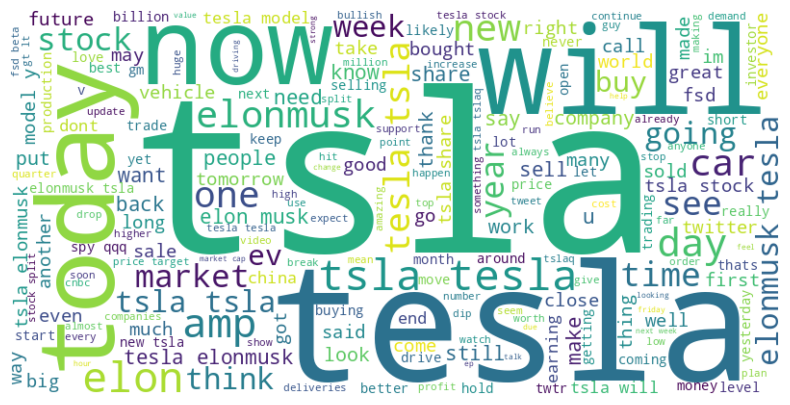

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'tweet' column contains the text data
text_data = ' '.join(train['Tweet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Bi-Gram Cloud

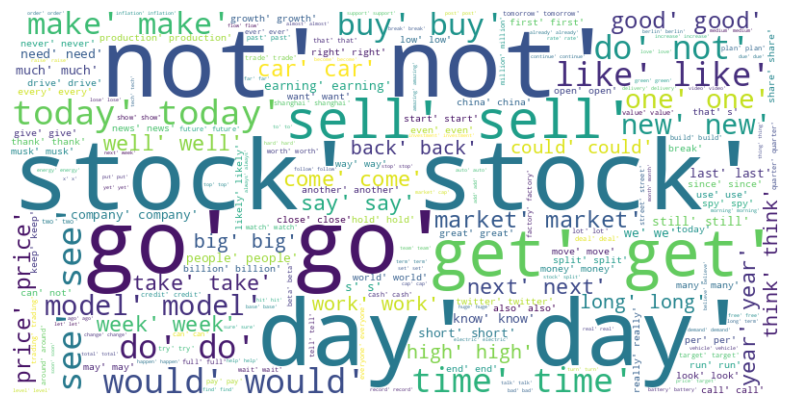

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'bigrams' column contains tuples of bigram phrases
bigram_text = ' '.join([' '.join(map(str, bigrams)) for bigrams in train['bigrams']])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bigram_text)

# Display the bigram word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Tri-Gram Cloud

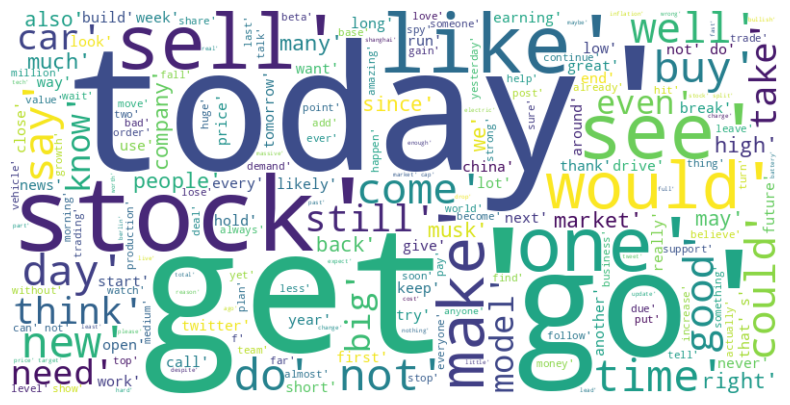

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'trigrams' column contains tuples of trigram phrases
trigram_text = ' '.join([' '.join(map(str, trigrams)) for trigrams in train['trigrams']])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(trigram_text)

# Display the trigram word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis using VADER

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Assuming 'tokenized_tweets' is your tokenized tweets column in DataFrame 'df'
# Replace 'df' and 'tokenized_tweets' with your actual DataFrame and column names

# Function to calculate sentiment scores
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Assuming you have your lemmatized tweets in a column 'lemmatized_tweets' of your DataFrame 'train'

# Initialize the VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_scores(text):
    # Join the list of lemmatized words into a single string
    text = ' '.join(text)
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Apply sentiment analysis to the tokenized tweets column and create a new column for sentiment scores
train['sentiment_scores'] = train['lemmatized_tweets'].apply(get_sentiment_scores)

In [ ]:
# Extract the compound sentiment score, which is a normalized compound score between -1 (negative) and 1 (positive)
train['compound_score'] = train['sentiment_scores'].apply(lambda x: x['compound'])

In [ ]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text,sentiment_scores,compound_score
36112,2021-10-13 20:34:48+00:00,thanks to tsla my annualized gain since is no...,TSLA,"Tesla, Inc.",[],[],"[thanks, gain, since, solid, year, rate, gon, ...","[thank, gain, since, solid, year, rate, go, to...","[(thank, VERB), (gain, NOUN), (since, SCONJ), ...","[[gain], [year, rate], [roar]]","[gain, year rate, roar]","[(thank, gain), (gain, since), (since, solid),...","[(thank, gain, since), (gain, since, solid), (...",thank gain since solid year rate go to roar,"{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp...",0.7579
615,2022-09-21 18:03:05+00:00,markets will now reverse and go up tsla,TSLA,"Tesla, Inc.",[],[],"[reverse, go]","[reverse, go]","[(reverse, NOUN), (go, VERB)]",[[reverse]],[reverse],"[(reverse, go)]",[],reverse go,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
10788,2022-05-22 20:22:34+00:00,i am not sure what sort of black magic this is...,TSLA,"Tesla, Inc.","[Tesla, elonmusk]",[],"[sure, sort, black, magic, thing, left, stop, ...","[sure, sort, black, magic, thing, leave, stop,...","[(sure, ADJ), (sort, ADV), (black, ADJ), (magi...","[[thing], [stop, car, computer], [video]]","[thing, stop car computer, video]","[(sure, sort), (sort, black), (black, magic), ...","[(sure, sort, black), (sort, black, magic), (b...",sure sort black magic thing leave stop car com...,"{'neg': 0.248, 'neu': 0.584, 'pos': 0.168, 'co...",-0.0258
279,2022-09-26 21:55:31+00:00,just like how its funny today when someone say...,TSLA,"Tesla, Inc.",[],[],"[like, funny, today, someone, book, company, f...","[like, funny, today, someone, book, company, f...","[(like, ADP), (funny, ADJ), (today, NOUN), (so...","[[today], [book, company], [people], [car, com...","[today, book company, people, car company]","[(like, funny), (funny, today), (today, someon...","[(like, funny, today), (funny, today, someone)...",like funny today someone book company funny fu...,"{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compou...",0.8074
37009,2021-10-04 13:35:04+00:00,tesla going for this morning on huge delivery...,TSLA,"Tesla, Inc.",[],[],"[going, morning, huge, delivery, also, annual,...","[go, morning, huge, delivery, also, annual, me...","[(go, VERB), (morning, NOUN), (huge, ADJ), (de...","[[morning], [delivery], [meeting, week]]","[morning, delivery, meeting week]","[(go, morning), (morning, huge), (huge, delive...","[(go, morning, huge), (morning, huge, delivery...",go morning huge delivery also annual meeting w...,"{'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'comp...",0.5267
34563,2021-10-25 16:39:12+00:00,the big question is now how massive will the p...,TSLA,"Tesla, Inc.",[],[],"[big, question, massive, profit, taking, targe...","[big, question, massive, profit, take, target,...","[(big, ADJ), (question, NOUN), (massive, ADJ),...","[[question], [profit], [target]]","[question, profit, target]","[(big, question), (question, massive), (massiv...","[(big, question, massive), (question, massive,...",big question massive profit take target sometime,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...",0.4404
35875,2021-10-15 22:10:38+00:00,news short seller michael burry says hes no lo...,TSLA,"Tesla, Inc.",[],[],"[news, short, seller, burry, longer, betting, ...","[news, short, seller, burry, long, bet, put, p...","[(news, NOUN), (short, ADJ), (seller, NOUN), (...","[[news], [seller], [bet], [position, trade]]","[news, seller, bet, position trade]","[(news, short), (short, seller), (seller, burr...","[(news, short, seller), (short, seller, burry)...",news short seller burry long bet put position ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
25271,2022-01-08 13:20:23+00:00,here is the best way of living minimalistic l...,TSLA,"Tesla, Inc.",[],[],"[best, way, living, live, total, fill]","[good, way, live, live, total, fill]","[(good, ADJ), (way, NOUN

## Hierarchical Clustering

In [ ]:
# import pandas as pd
# from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# import matplotlib.pyplot as plt

# # Assuming you have a DataFrame 'tfidf_df' with TF-IDF values

# # Perform Hierarchical Clustering
# linkage_matrix = linkage(tfidf_df, method='ward', metric='euclidean')

# # Determine the optimal number of clusters using a dendrogram
# plt.figure(figsize=(12, 6))
# dendrogram(linkage_matrix, truncate_mode='level', p=5)
# plt.xlabel('Number of clusters')
# plt.ylabel('Distance')
# plt.title('Dendrogram')
# plt.show()

In [ ]:
# # Based on the dendrogram, visually determine an appropriate number of clusters

# # Assign cluster labels using the determined number of clusters
# num_clusters = 4  # You can adjust this based on your visual inspection
# cluster_labels = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# # Add cluster labels to your DataFrame
# tfidf_df['cluster_label'] = cluster_labels

## PCA & K-Means Clustering

In [ ]:
# Combine sentiment scores and TF-IDF vectors
X = pd.concat([train['compound_score'], tfidf_df], axis=1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
import numpy as np
from sklearn.decomposition import IncrementalPCA

# Step 1: Determine the Number of Components for PCA
explained_variance_threshold = 0.95  # Set your desired threshold

# Initialize Incremental PCA
n_components = 3  # Choose the number of components
ipca = IncrementalPCA(n_components=n_components)

# Define a batch size for IPCA (adjust based on your available memory)
batch_size = 1000

# Process the data in batches
for i in range(0, len(X), batch_size):
    X_batch = X[i:i + batch_size]
    ipca.partial_fit(X_batch)

# Calculate explained variance
explained_variance = ipca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Find the optimal number of components
optimal_components = np.argmax(cumulative_explained_variance >= explained_variance_threshold) + 1

# Transform the data using the optimal number of components
X_pca = ipca.transform(X)

# Print the results
print("Optimal number of components:", optimal_components)
print("Explained variance:", cumulative_explained_variance)


Optimal number of components: 1
Explained variance: [0.13913343 0.14856038 0.15445377]


In [ ]:
optimal_components

1

In [ ]:
# Step 2: Perform PCA
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X)

In [ ]:
# Step 3: Determine the Number of Clusters for K-Means
# Use the Elbow Method to find the optimal number of clusters
inertia = []
max_clusters = 10  # Adjust the maximum number of clusters as needed

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

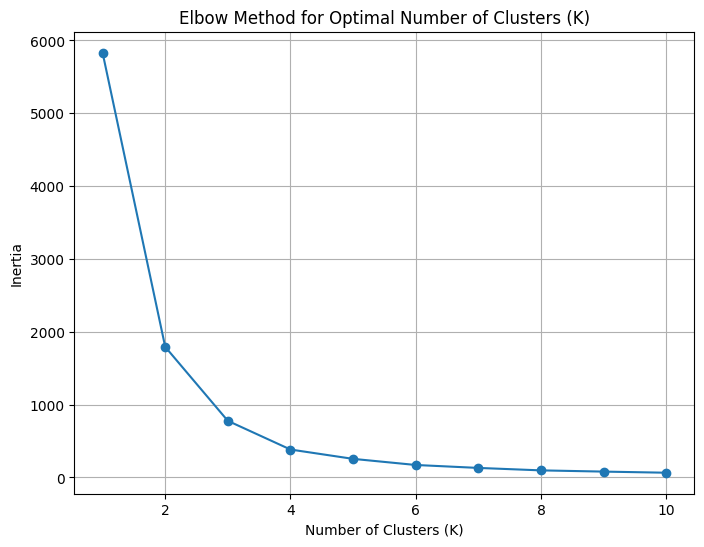

In [ ]:
# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [ ]:
# Choose the optimal number of clusters based on the Elbow Method
optimal_clusters = 3  # Set the optimal number of clusters

# Step 4: Perform K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

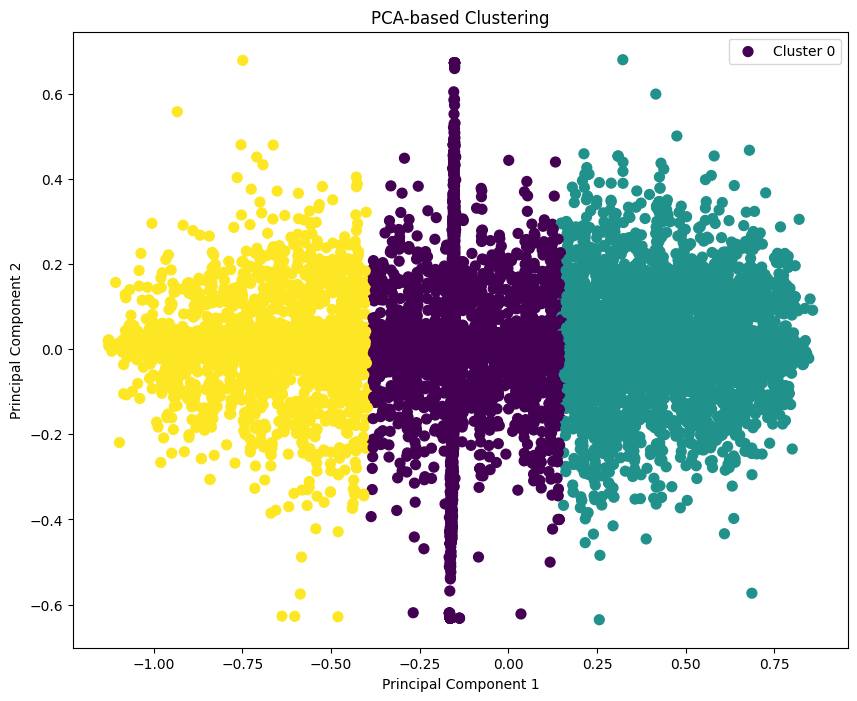

In [ ]:
import numpy as np
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt

# Initialize Incremental PCA with a sufficient number of components
n_components = 2  # Set the number of components to 2 for a 2D scatter plot
ipca = IncrementalPCA(n_components=n_components)

# Define a batch size for IPCA (adjust based on your available memory)
batch_size = 1000

# Process the data in batches
for i in range(0, len(X), batch_size):
    X_batch = X[i:i + batch_size]
    ipca.partial_fit(X_batch)

# Transform the data using the specified number of components
X_pca = ipca.transform(X)

# Create a scatter plot of the PCA-reduced data points with cluster colors
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)  # Adjust the size (s) as needed
plt.title('PCA-based Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add legend
legend_labels = [f'Cluster {i}' for i in range(optimal_clusters)]
plt.legend(legend_labels, loc='upper right')

plt.show()


In [ ]:
# Choose the optimal number of clusters based on the Elbow Method
optimal_clusters = 4  # Set the optimal number of clusters

# Step 4: Perform K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

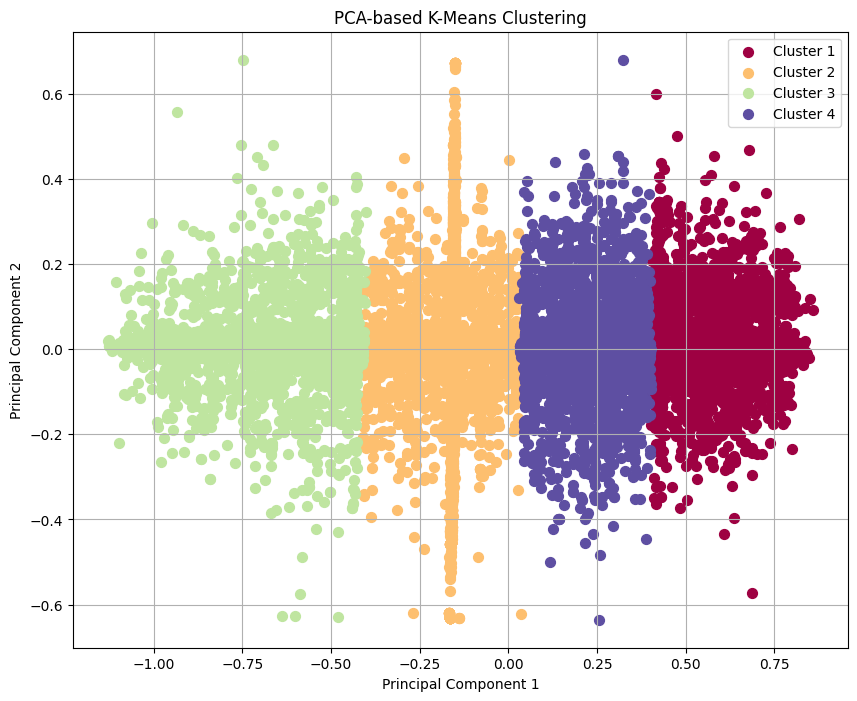

In [ ]:
# Scatter plot of the clustering results
plt.figure(figsize=(10, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, optimal_clusters))

for cluster_num in range(optimal_clusters):
    cluster_points = X_pca[cluster_labels == cluster_num]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=colors[cluster_num], label=f'Cluster {cluster_num + 1}')

plt.title("PCA-based K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.600675147029113


In [ ]:
# Add K-Means cluster labels to your DataFrame
train['kmeans_clusters'] = cluster_labels

In [ ]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text,sentiment_scores,compound_score,kmeans_clusters
9616,2022-06-03 14:45:10+00:00,tesla down on news they are firing the worst ...,TSLA,"Tesla, Inc.",[],[],"[news, firing, worst, white, collar, like]","[news, fire, bad, white, collar, like]","[(news, NOUN), (fire, NOUN), (bad, ADJ), (whit...","[[news, fire], [collar]]","[news fire, collar]","[(news, fire), (fire, bad), (bad, white), (whi...","[(news, fire, bad), (fire, bad, white), (bad, ...",news fire bad white collar like,"{'neg': 0.518, 'neu': 0.263, 'pos': 0.219, 'co...",-0.5267,2
11280,2022-05-20 01:15:36+00:00,and the truth is the worlds best talent alrea...,TSLA,"Tesla, Inc.",[MartinViecha],[],"[truth, best, talent, already, already, works,...","[truth, good, talent, already, already, work, ...","[(truth, NOUN), (good, ADJ), (talent, NOUN), (...","[[truth], [talent], [ask], [money], [imaginati...","[truth, talent, ask, money, imagination stock,...","[(truth, good), (good, talent), (talent, alrea...","[(truth, good, talent), (good, talent, already...",truth good talent already already work ask spe...,"{'neg': 0.103, 'neu': 0.538, 'pos': 0.359, 'co...",0.6908,0
12303,2022-05-10 19:05:39+00:00,if you ever wanted to join the azukiofficial e...,TSLA,"Tesla, Inc.",[AzukiOfficial],[],"[ever, join, ecosystem, time, remember, early,...","[ever, join, ecosystem, time, remember, early,...","[(ever, ADV), (join, VERB), (ecosystem, NOUN),...","[[ecosystem, time], [day, stock], [day, one], ...","[ecosystem time, day stock, day one, accident ...","[(ever, join), (join, ecosystem), (ecosystem, ...","[(ever, join, ecosystem), (join, ecosystem, ti...",ever join ecosystem time remember early day st...,"{'neg': 0.134, 'neu': 0.647, 'pos': 0.22, 'com...",0.2500,3
21232,2022-02-12 02:59:02+00:00,tesla recognized a whopping from fsd sales la...,TSLA,"Tesla, Inc.",[],[],"[whopping, last, quarter, revenue, baked, stoc...","[whopping, last, quarter, revenue, bake, stock...","[(whopping, ADJ), (last, ADJ), (quarter, NOUN)...","[[quarter, revenue, bake, stock, price], [risk]]","[quarter revenue bake stock price, risk]","[(whopping, last), (last, quarter), (quarter, ...","[(whopping, last, quarter), (last, quarter, re...",whopping last quarter revenue bake stock price...,"{'neg': 0.168, 'neu': 0.594, 'pos': 0.238, 'co...",0.1058,1
20987,2022-02-15 12:23:51+00:00,elon musk owns of tesla tsla as of december ...,TSLA,"Tesla, Inc.",[],[],"[musk, according]","[musk, accord]","[(musk, PROPN), (accord, NOUN)]",[[accord]],[accord],"[(musk, accord)]",[],musk accord,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
25800,2022-01-04 10:28:48+00:00,tsla could move higher between now and earni...,TSLA,"Tesla, Inc.",[],[],"[could, move, higher, earnings, ratchet, since...","[could, move, high, earning, ratchet, since, r...","[(could, AUX), (move, VERB), (high, ADJ), (ear...","[[ratchet], [rise], [run, rate]]","[ratchet, rise, run rate]","[(could, move), (move, high), (high, earning),...","[(could, move, high), (move, high, earning), (...",could move high earning ratchet since rise low...,"{'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'comp...",-0.2732,2
1882,2022-09-04 01:18:57+00:00,doing my part by using the tesla virtual power...,TSLA,"Tesla, Inc.",[tesla],[],"[part, virtual, power, plant, heavy, fire, sea...","[part, virtual, power, plant, heavy, fire, sea...","[(part, NOUN), (virtual, ADJ), (power, NOUN), ...","[[part], [power, plant], [fire, season]]","[part, power plant, fire season]","[(part, virtual), (virtual, power), (power, pl...","[(part, virtual, power), (virtual, power, plan...",part virtual power plant heavy fire season,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.3400,2
17566,2022-03-27 20:34:48+00:00,i have to say its by a large margin the best q...,TSLA,"Tesla, Inc.","[alex_avoigt, Tesla, elonmusk]",[],"[say, large, margin, b

## Agglomerative Hierarchical Clustering

In [ ]:
import numpy as np

# Assuming you have a DataFrame named 'X' with your data
# Replace 'X' with the actual variable name holding your dataset

# Specify the sample size you want to select
sample_size = 1000

# Generate random indices within the range of your DataFrame's shape
random_indices = np.random.choice(X.shape[0], sample_size, replace=True)

# Use the random indices to select the corresponding rows from your DataFrame
sub_X = X.iloc[random_indices]

# Now, 'sub_X' contains a random subset of rows from your original DataFrame 'X'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have your sentiment score column as 'sentiment_scores' and TF-IDF matrix in 'X'

# Step 1: Create a linkage matrix using your TF-IDF matrix
linkage_matrix = linkage(sub_X, method='ward')  # You can choose a different linkage method if needed

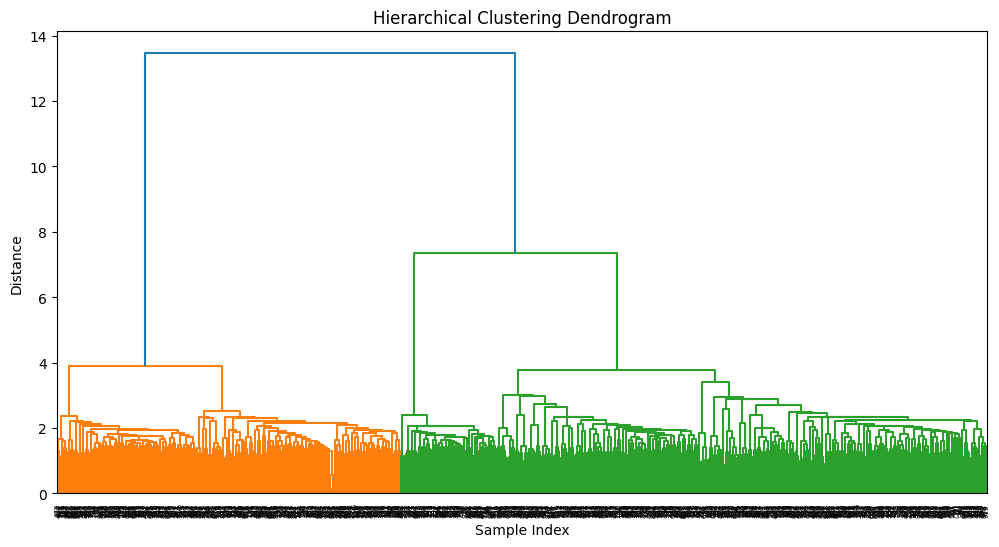

In [ ]:
# Step 2: Plot the Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, p=30, truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Example: Determine the optimal number of clusters using the dendrogram
max_d = 50  # Set a maximum distance threshold for cutting the dendrogram
optimal_clusters = len(np.unique(fcluster(linkage_matrix, max_d, criterion='distance')))

In [ ]:
# Step 4: Perform Hierarchical Clustering with the Optimal Number of Clusters
cluster_assignments = fcluster(linkage_matrix, max_d, criterion='distance')

# Stock Prediction using Sentiment Analysis & Generative Adversarial Network

In [ ]:
train['tweets'] = dataset['Tweet']

NameError: ignored

In [ ]:
train.head()

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text,sentiment_scores,compound_score,kmeans_clusters,tweets
0,2022-09-29 23:41:16+00:00,mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",[Tesla],[],"[media, done, amazing, job, brainwashing, peop...","[medium, do, amazing, job, brainwash, people, ...","[(medium, NOUN), (do, VERB), (amazing, ADJ), (...","[[medium], [job, brainwash, people, today, wor...","[medium, job brainwash people today work, catc...","[(medium, do), (do, amazing), (amazing, job), ...","[(medium, do, amazing), (do, amazing, job), (a...",medium do amazing job brainwash people today w...,"{'neg': 0.219, 'neu': 0.614, 'pos': 0.167, 'co...",-0.0516,0,Mainstream media has done an amazing job at br...
1,2022-09-29 23:24:43+00:00,tesla delivery estimates are at around from t...,TSLA,"Tesla, Inc.",[],[],"[delivery, around]","[delivery, around]","[(delivery, NOUN), (around, ADP)]",[[delivery]],[delivery],"[(delivery, around)]",[],delivery around,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0,Tesla delivery estimates are at around 364k fr...
2,2022-09-29 23:18:08+00:00,even if i include unvested rsus as of addit...,TSLA,"Tesla, Inc.",[],[],"[even, include, unvested, additional, equity, ...","[even, include, unvested, additional, equity, ...","[(even, ADV), (include, VERB), (unvested, ADJ)...","[[equity], [deal], [tomorrow], [equity]]","[equity, deal, tomorrow, equity]","[(even, include), (include, unvested), (unvest...","[(even, include, unvested), (include, unvested...",even include unvested additional equity x deal...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0,3/ Even if I include 63.0M unvested RSUs as of...
3,2022-09-29 22:40:07+00:00,realdanodowd wholemarsblog tesla hahaha why ar...,TSLA,"Tesla, Inc.","[RealDanODowd, WholeMarsBlog, Tesla]",[],"[still, trying, stop, get, together, make, som...","[still, try, stop, get, together, make, someth...","[(still, ADV), (try, VERB), (stop, VERB), (get...","[[work], [ass, clown]]","[work, ass clown]","[(still, try), (try, stop), (stop, get), (get,...","[(still, try, stop), (try, stop, get), (stop, ...",still try stop get together make something wel...,"{'neg': 0.402, 'neu': 0.502, 'pos': 0.096, 'co...",-0.7717,2,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...
4,2022-09-29 22:27:05+00:00,realdanodowd tesla stop trying to kill kids yo...,TSLA,"Tesla, Inc.","[RealDanODowd, Tesla]",[],"[stop, trying, kill, sad, deranged, old, man]","[stop, try, kill, sad, derange, old, man]","[(stop, VERB), (try, VERB), (kill, VERB), (sad...","[[derange], [man]]","[derange, man]","[(stop, try), (try, kill), (kill, sad), (sad, ...","[(stop, try, kill), (try, kill, sad), (kill, s...",stop try kill sad derange old man,"{'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'comp...",-0.8750,2,"@RealDanODowd @Tesla Stop trying to kill kids,..."


In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Apply sentiment analysis to the 'text' column and create new columns for sentiment scores
train['sentiment_scores'] = train['tweets'].apply(get_sentiment_scores)

# Extract the compound sentiment score
train['compound_score'] = train['sentiment_scores'].apply(lambda x: x['compound'])

In [ ]:
train.sample(10)

,Date,Tweet,Stock Name,Company Name,user_mentions,hashtags,tweet_tokens,lemmatized_tweets,pos_tags,noun_phrases,noun_phrases_text,bigrams,trigrams,tfidf_text,sentiment_scores,compound_score,kmeans_clusters,tweets
22508,2022-01-28 22:19:21+00:00,have a good weekend everyone lets keep up this...,TSLA,"Tesla, Inc.",[],[],"[good, weekend, everyone, keep, momentum]","[good, weekend, everyone, keep, momentum]","[(good, ADJ), (weekend, NOUN), (everyone, PRON...","[[weekend], [momentum]]","[weekend, momentum]","[(good, weekend), (weekend, everyone), (everyo...","[(good, weekend, everyone), (weekend, everyone...",good weekend everyone keep momentum,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",0.4404,3,Have a good weekend everyone. Let's keep up th...
26070,2022-01-03 10:46:51+00:00,be prepared for a lot of tsla price target rai...,TSLA,"Tesla, Inc.",[],[],"[prepared, lot, price, target, next, target, s...","[prepare, lot, price, target, next, target, se...","[(prepare, VERB), (lot, NOUN), (price, NOUN), ...","[[lot, price, target], [target, sector, perform]]","[lot price target, target sector perform]","[(prepare, lot), (lot, price), (price, target)...","[(prepare, lot, price), (lot, price, target), ...",prepare lot price target next target sector pe...,"{'neg': 0.0, 'neu': 0.917, 'pos': 0.083, 'comp...",0.2263,0,Be prepared for a lot of $tsla price target ra...
32795,2021-11-03 23:44:23+00:00,charting my list of potential leaders a chart...,TSLA,"Tesla, Inc.",[tradingview],[],"[charting, list, potential, amba, coin, net, p...","[chart, list, potential, amba, coin, net, peri...","[(chart, NOUN), (list, VERB), (potential, ADJ)...","[[chart], [skin, wolf]]","[chart, skin wolf]","[(chart, list), (list, potential), (potential,...","[(chart, list, potential), (list, potential, a...",chart list potential amba coin net peri si ski...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0,"Charting my list of potential leaders, a 🧵:\n\..."
706,2022-09-20 10:54:40+00:00,tesla to increase price of supercharger use in...,TSLA,"Tesla, Inc.",[],[],"[increase, price, supercharger, use]","[increase, price, supercharger, use]","[(increase, VERB), (price, NOUN), (supercharge...","[[price, supercharger, use]]",[price supercharger use],"[(increase, price), (price, supercharger), (su...","[(increase, price, supercharger), (price, supe...",increase price supercharger use,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...",0.4648,3,*TESLA TO INCREASE PRICE OF SUPERCHARGER USE I...
21137,2022-02-13 22:29:01+00:00,weekly market prep es nq rty tsla arkk btc eth...,TSLA,"Tesla, Inc.",[],"[Gold, Silver, Oil, NaturalGas]","[weekly, market, prep, es, doge, gold, silver,...","[weekly, market, prep, es, doge, gold, silver,...","[(weekly, ADJ), (market, NOUN), (prep, NOUN), ...","[[market, prep], [gold, silver, oil, thank, wa...","[market prep, gold silver oil thank watch]","[(weekly, market), (market, prep), (prep, es),...","[(weekly, market, prep), (market, prep, es), (...",weekly market prep es doge gold silver oil tha...,"{'neg': 0.0, 'neu': 0.92, 'pos': 0.08, 'compou...",0.4199,1,"Weekly Market Prep $ES, $NQ, $RTY, $TSLA, $ARK..."
14784,2022-04-20 20:17:20+00:00,monster earnings report for tsla and we have o...,TSLA,"Tesla, Inc.",[],[],"[monster, earnings, report, far, today, think,...","[monster, earning, report, far, today, think, ...","[(monster, NOUN), (earning, VERB), (report, NO...","[[monster], [report], [today], [bottom]]","[monster, report, today, bottom]","[(monster, earning), (earning, report), (repor...","[(monster, earning, report), (earning, report,...",monster earning report far today think high bo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0,Monster earnings report for $TSLA and we have ...
13270,2022-04-30 00:15:20+00:00,elonmusk tesla teslarati janeidyeve will you ...,TSLA,"Tesla, Inc.","[elonmusk, Cbiggs90, Tesla, Teslarati, Janeidy...",[],[recognize],[recognize],"[(recognize, VERB)]",[],[],[],[],recognize,"{'ne

# ******

In [ ]:
stock_tweets = train[['Date','compound_score']]

In [ ]:
stock_tweets.sample(10)

,Date,compound_score
33760,2021-10-29 04:42:28+00:00,0.4738
18808,2022-03-14 20:10:11+00:00,0.8581
2234,2022-08-30 11:29:02+00:00,-0.2500
21571,2022-02-08 11:41:19+00:00,-0.4648
4806,2022-08-03 15:56:23+00:00,-0.6207
3204,2022-08-18 20:46:21+00:00,-0.2500
4045,2022-08-10 08:54:00+00:00,0.0000
21982,2022-02-03 04:11:42+00:00,0.3400
21738,2022-02-06 03:02:07+00:00,0.3612
19135,2022-03-10 13:54:32+00:00,-0.1280


In [ ]:
stock_tweets.shape

(37422, 2)

In [ ]:
stock_tweets['Date'] = pd.to_datetime(stock_tweets['Date'])
stock_tweets['Date'] = stock_tweets['Date'].dt.date

In [ ]:
stock_tweets.head()

,Date,compound_score
0,2022-09-29,0.0772
1,2022-09-29,0.0000
2,2022-09-29,0.2960
3,2022-09-29,-0.7568
4,2022-09-29,-0.8750


In [ ]:
stock_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37422 entries, 0 to 37421
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            37422 non-null  object 
 1   compound_score  37422 non-null  float64
dtypes: float64(1), object(1)
memory usage: 877.1+ KB


In [ ]:
twitter_df = stock_tweets.groupby([stock_tweets['Date']]).mean()
print(twitter_df.shape)

(365, 1)


In [ ]:
twitter_df.sample(10)

,compound_score
Date,
2021-11-29,0.182057
2021-12-21,0.122269
2022-07-15,0.145201
2022-03-27,0.073488
2021-10-05,0.069445
2022-01-03,0.128703
2022-05-07,0.128398
2022-08-06,0.254393
2022-09-14,0.139693


In [ ]:
stocks = pd.read_csv('stock_yfinance_data.csv')
print(stocks.shape)
stocks.head()

(6300, 8)


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,1/3/2022,382.583344,400.356659,378.679993,399.926666,399.926666,103931400,TSLA
1,1/3/2022,335.350006,338.000000,329.779999,334.750000,331.642487,28865100,MSFT
2,1/3/2022,161.690002,162.940002,159.880005,162.899994,158.953903,9317300,PG
3,1/3/2022,338.299988,341.079987,337.190002,338.540008,338.540008,14537900,META
4,1/3/2022,167.550003,170.703507,166.160507,170.404495,170.404495,63520000,AMZN


In [ ]:
stock_name = 'TSLA'

In [ ]:
stock_df = stocks[stocks['Stock Name'] == stock_name]
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df['Date'] = stock_df['Date'].dt.date

In [ ]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400,TSLA
25,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300,TSLA
50,2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800,TSLA
75,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600,TSLA
100,2022-01-07,360.123321,360.309998,336.666656,342.320007,342.320007,84164700,TSLA


In [ ]:
stock_df.shape

(252, 8)

In [ ]:
final_df = stock_df.join(twitter_df, how="left", on="Date")
final_df = final_df.drop(columns=['Stock Name'])
print(final_df.shape)

(252, 8)


In [ ]:
final_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,compound_score
0,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400,0.128703
25,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300,0.088349
50,2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800,0.086477
75,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600,0.146734
100,2022-01-07,360.123321,360.309998,336.666656,342.320007,342.320007,84164700,0.087587


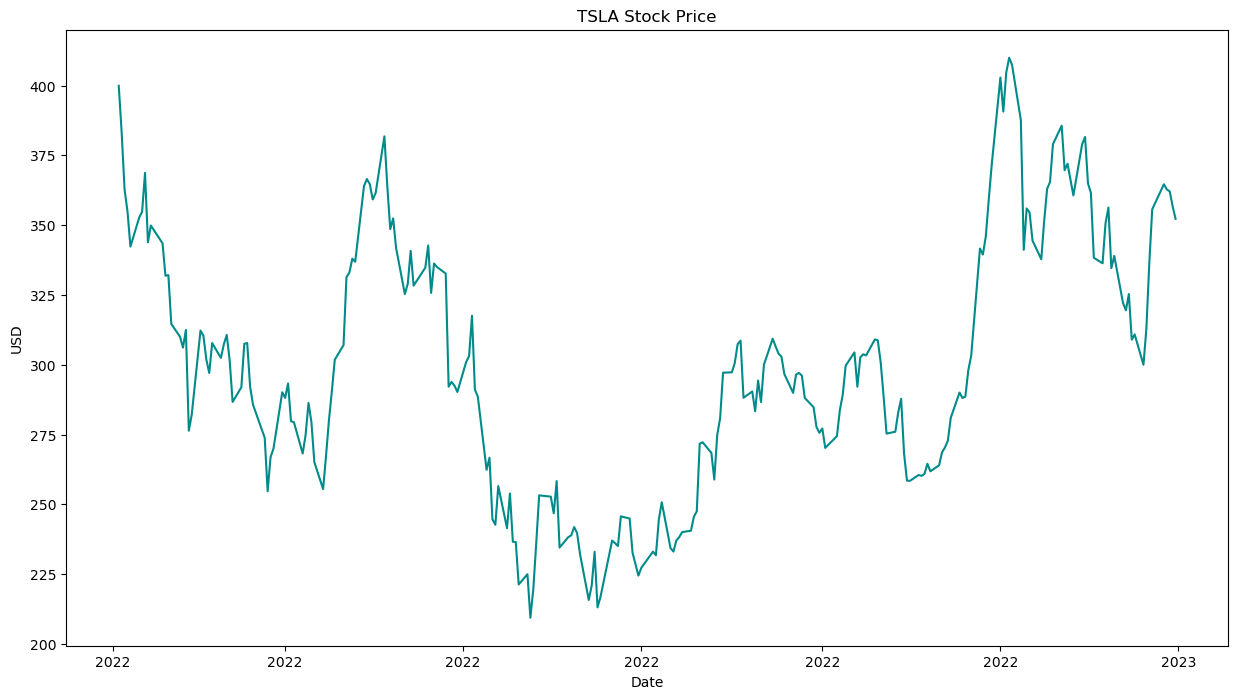

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter  # Import DateFormatter

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(final_df['Date'], final_df['Close'], color='#008B8B')
ax.set(xlabel="Date", ylabel="USD", title=f"{stock_name} Stock Price")
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
plt.show()

## Adding technical indicators¶

**MA(7)** stans for Moving Average for past 7 days, whereas **MA(20)** means Moving Average for past 20 days.

**EMA** is Exponential Moving average and we can calculate it as:

EMA_t = Pclose + (EMA_t-1 (100 - P))*
**Bollinger Bands** are calculated as:

middle line: stdev(MA(20))
upper bound: MA(20) + 2stdev(MA(20))
lower bound: MA(20) - 2stdev(MA(20))

In [ ]:
def get_tech_ind(data):
    data['MA7'] = data.iloc[:,4].rolling(window=7).mean() #Close column
    data['MA20'] = data.iloc[:,4].rolling(window=20).mean() #Close Column

    data['MACD'] = data.iloc[:,4].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()
    #This is the difference of Closing price and Opening Price

    # Create Bollinger Bands
    data['20SD'] = data.iloc[:, 4].rolling(20).std()
    data['upper_band'] = data['MA20'] + (data['20SD'] * 2)
    data['lower_band'] = data['MA20'] - (data['20SD'] * 2)

    # Create Exponential moving average
    data['EMA'] = data.iloc[:,4].ewm(com=0.5).mean()

    # Create LogMomentum
    data['logmomentum'] = np.log(data.iloc[:,4] - 1)

    return data

In [ ]:
tech_df = get_tech_ind(final_df)
dataset = tech_df.iloc[20:,:].reset_index(drop=True)
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,compound_score,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA,logmomentum
0,2022-02-01,311.736664,314.566681,301.666656,310.416656,310.416656,73138200,0.149576,301.391902,332.247330,6.549781,28.432861,389.113051,275.381608,307.894386,5.734689
1,2022-02-02,309.393341,310.500000,296.470001,301.886658,301.886658,66792900,0.137314,300.232853,328.181830,5.738858,26.512653,381.207136,275.156523,303.889234,5.706734
2,2022-02-03,294.000000,312.333344,293.506653,297.046661,297.046661,78855600,0.127096,298.934758,324.898830,6.895141,26.074153,377.047135,272.750524,299.327519,5.690517
3,2022-02-04,299.073334,312.166656,293.723328,307.773346,307.773346,73625400,0.237870,298.263807,322.542497,7.925764,25.339312,373.221121,271.863874,304.958070,5.726109
4,2022-02-07,307.929993,315.923340,300.903320,302.446655,302.446655,60994500,0.115852,301.989519,320.548830,6.919551,25.269841,371.088512,270.009147,303.283794,5.708593


In [ ]:
def tech_ind(dataset):
    fig,ax = plt.subplots(figsize=(15, 8), dpi = 200)
    x_ = range(3, dataset.shape[0])
    x_ = list(dataset.index)

    ax.plot(dataset['Date'], dataset['MA7'], label='Moving Average (7 days)', color='g', linestyle='--')
    ax.plot(dataset['Date'], dataset['Close'], label='Closing Price', color='#6A5ACD')
    ax.plot(dataset['Date'], dataset['MA20'], label='Moving Average (20 days)', color='r', linestyle='-.')
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))
    plt.title('Technical indicators')
    plt.ylabel('Close (USD)')
    plt.xlabel("Year")
    plt.legend()

    plt.show()

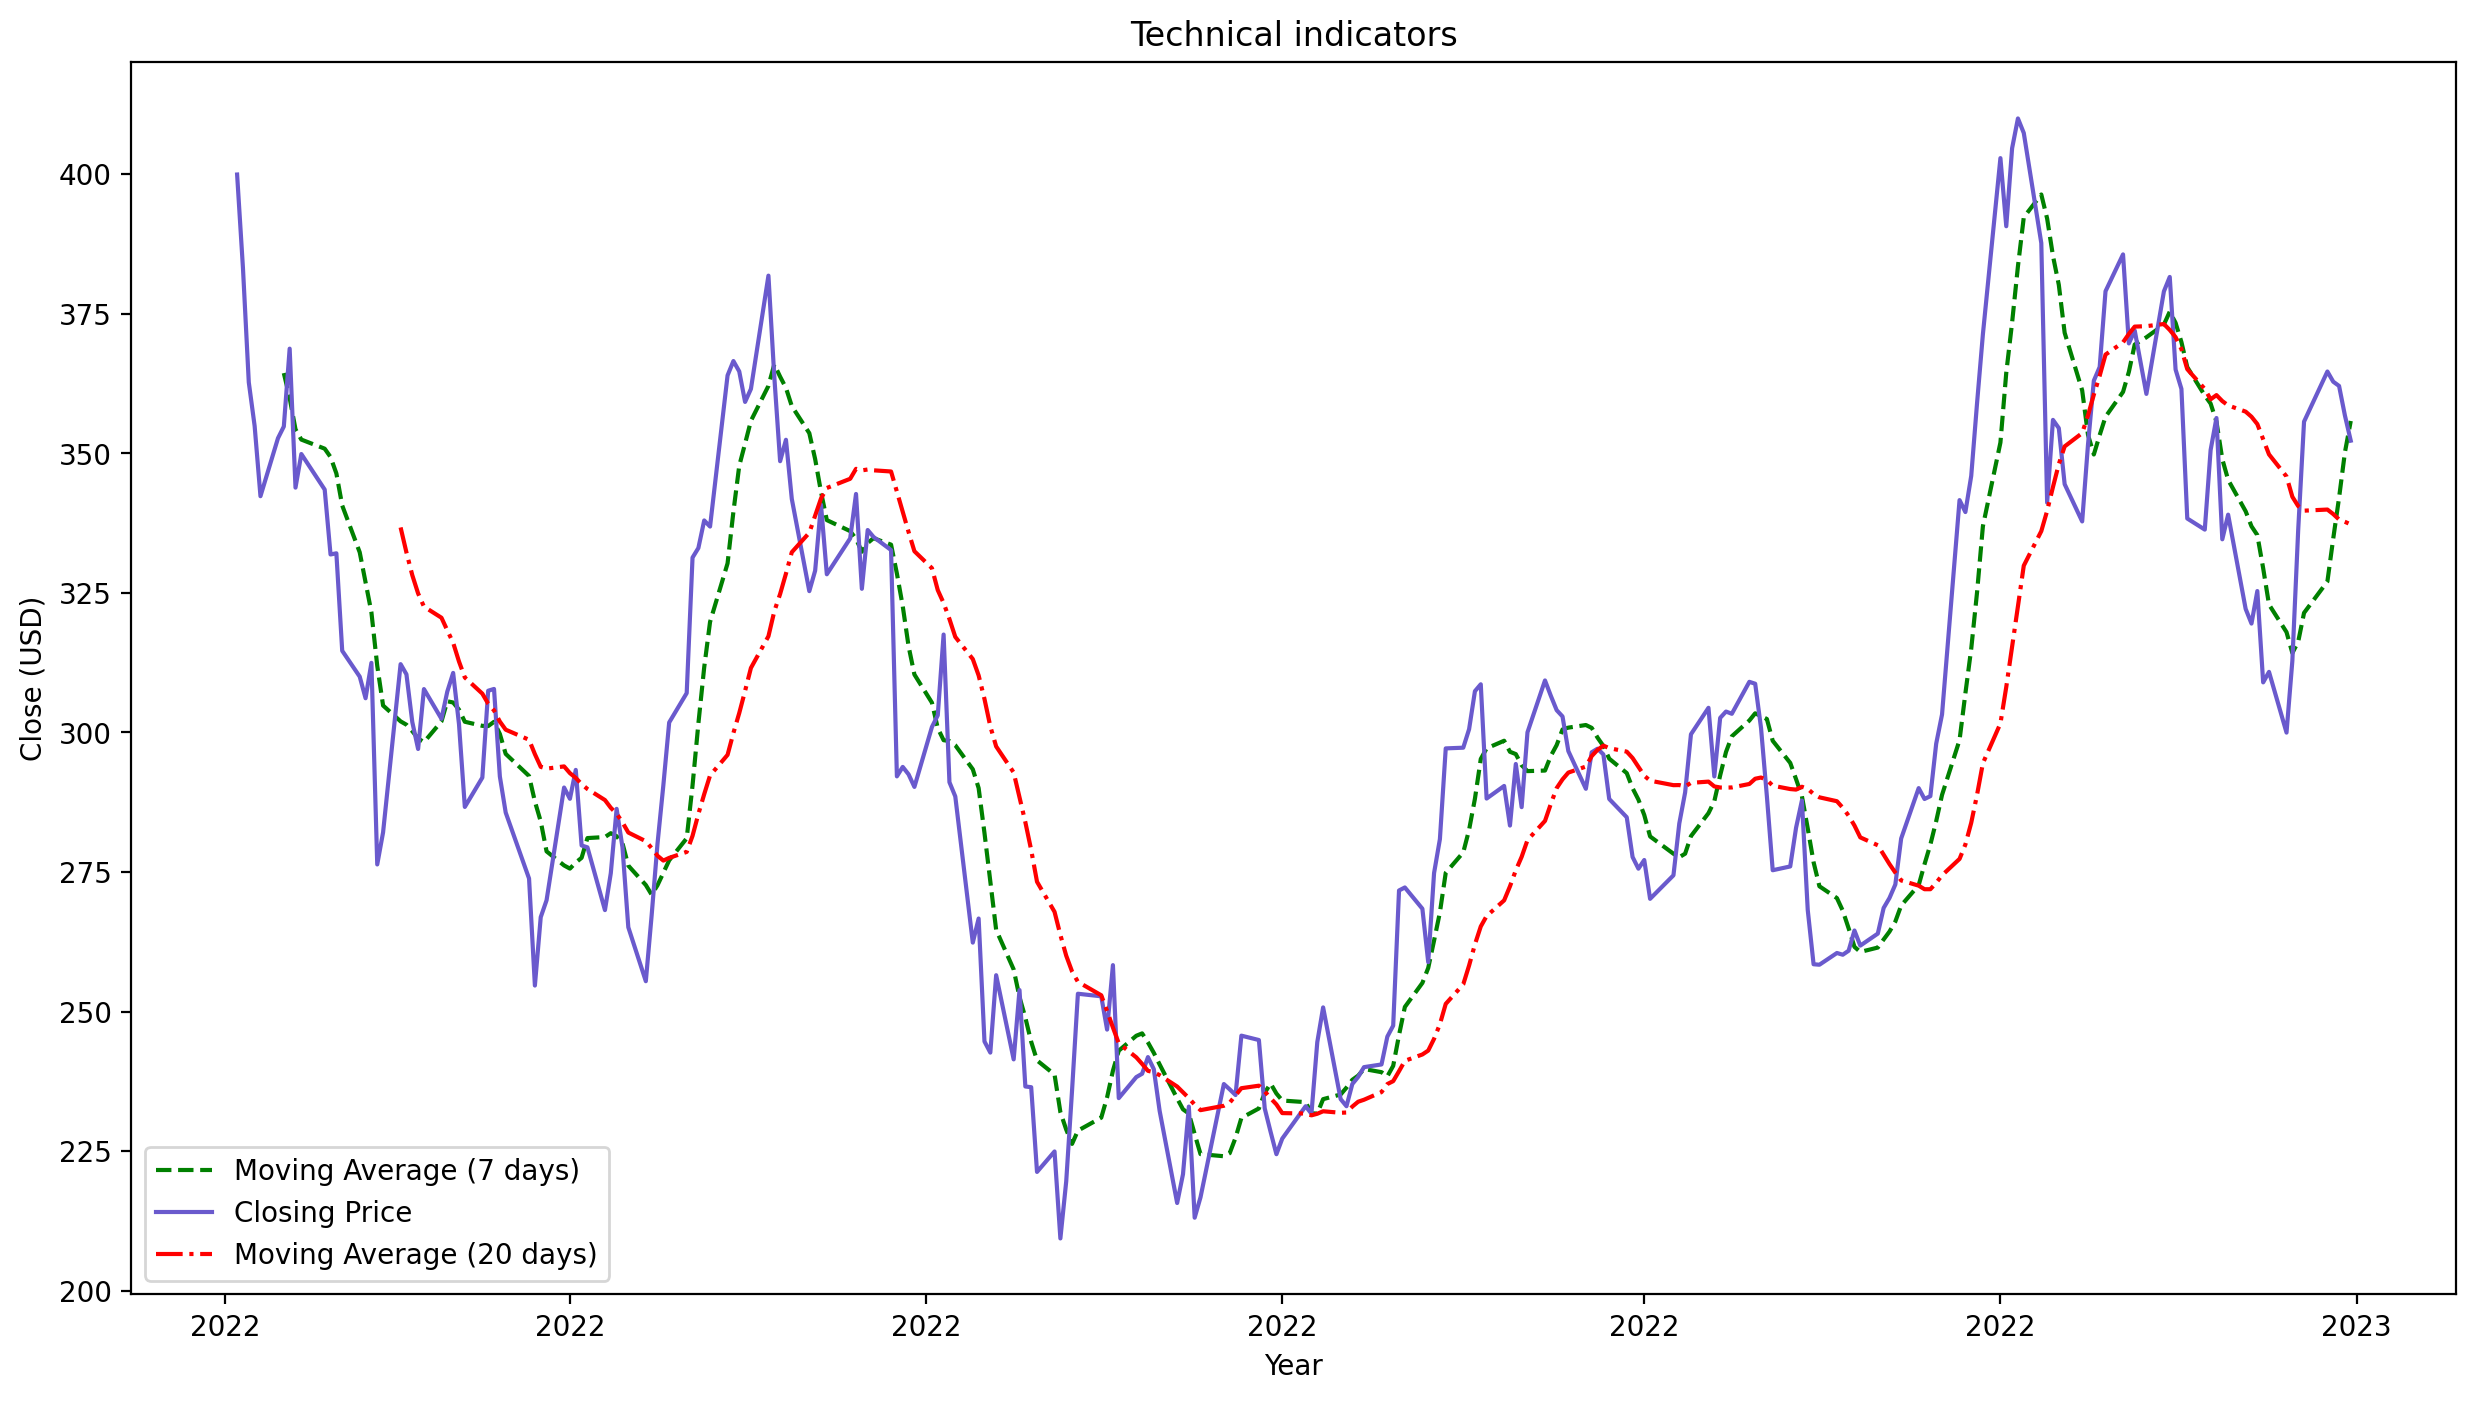

In [ ]:
tech_ind(tech_df)

In [ ]:
dataset.iloc[:, 1:] = pd.concat([dataset.iloc[:, 1:].ffill()])

In [ ]:
datetime_series = pd.to_datetime(dataset['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
dataset = dataset.set_index(datetime_index)
dataset = dataset.sort_values(by='Date')
dataset = dataset.drop(columns='Date')

In [ ]:
def normalize_data(df, range, target_column):

    '''
    df: dataframe object
    range: type tuple -> (lower_bound, upper_bound)
        lower_bound: int
        upper_bound: int
    target_column: type str -> should reflect closing price of stock
    '''

    target_df_series = pd.DataFrame(df[target_column])
    data = pd.DataFrame(df.iloc[:, :])

    X_scaler = MinMaxScaler(feature_range=range)
    y_scaler = MinMaxScaler(feature_range=range)
    X_scaler.fit(data)
    y_scaler.fit(target_df_series)

    X_scale_dataset = X_scaler.fit_transform(data)
    y_scale_dataset = y_scaler.fit_transform(target_df_series)

    dump(X_scaler, open('X_scaler.pkl', 'wb'))
    dump(y_scaler, open('y_scaler.pkl', 'wb'))

    return (X_scale_dataset,y_scale_dataset)

In [ ]:
def batch_data(x_data,y_data, batch_size, predict_period):
    X_batched, y_batched, yc = list(), list(), list()

    for i in range(0,len(x_data),1):
        x_value = x_data[i: i + batch_size][:, :]
        y_value = y_data[i + batch_size: i + batch_size + predict_period][:, 0]
        yc_value = y_data[i: i + batch_size][:, :]
        if len(x_value) == batch_size and len(y_value) == predict_period:
            X_batched.append(x_value)
            y_batched.append(y_value)
            yc.append(yc_value)

    return np.array(X_batched), np.array(y_batched), np.array(yc)

In [ ]:
def split_train_test(data):
    train_size = len(data) - 20
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

In [ ]:
def predict_index(dataset, X_train, batch_size, prediction_period):

    # get the predict data (remove the in_steps days)
    train_predict_index = dataset.iloc[batch_size: X_train.shape[0] + batch_size + prediction_period, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + batch_size:, :].index

    return train_predict_index, test_predict_index

In [ ]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import time
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from pickle import load
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from tensorflow.keras.utils import plot_model


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pickle  # Import the pickle module

X_scale_dataset,y_scale_dataset = normalize_data(dataset, (-1,1), "Close")
X_batched, y_batched, yc = batch_data(X_scale_dataset, y_scale_dataset, batch_size = 5, predict_period = 1)
print("X shape:", X_batched.shape)
print("y shape:", y_batched.shape)
print("yc shape:", yc.shape)

X_train, X_test, = split_train_test(X_batched)
y_train, y_test, = split_train_test(y_batched)
yc_train, yc_test, = split_train_test(yc)
index_train, index_test, = predict_index(dataset, X_train, 5, 1)

X shape: (227, 5, 15)
y shape: (227, 1)
yc shape: (227, 5, 1)


In [ ]:
input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]

## Build GAN model

In [ ]:
def make_generator_model(input_dim, output_dim, feature_size):
    model = tf.keras.Sequential([LSTM(units = 1024, return_sequences = True,
                                    input_shape=(input_dim, feature_size),recurrent_dropout = 0.3),
                               LSTM(units = 512, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 256, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 128, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 64, recurrent_dropout = 0.3),
                               Dense(32),
                               Dense(16),
                               Dense(8),
                               Dense(units=output_dim)])
    return model

In [ ]:
def make_discriminator_model(input_dim):
    cnn_net = tf.keras.Sequential()
    cnn_net.add(Conv1D(8, input_shape=(input_dim+1, 1), kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(16, kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(32, kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(64, kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(128, kernel_size=1, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    #cnn_net.add(Flatten())
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False, activation='relu'))
    cnn_net.add(Dense(1, activation='sigmoid'))
    return cnn_net

In [ ]:
def discriminator_loss(real_output, fake_output):
    loss_f = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    real_loss = loss_f(tf.ones_like(real_output), real_output)
    fake_loss = loss_f(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    loss_f = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    loss = loss_f(tf.ones_like(fake_output), fake_output)
    return loss

In [ ]:
@tf.function

def train_step(real_x, real_y, yc, generator, discriminator, g_optimizer, d_optimizer):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_data = generator(real_x, training=True)
        generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
        d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float64), yc], axis=1)
        real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
        d_real_input = tf.concat([real_y_reshape, yc], axis=1)

        real_output = discriminator(d_real_input, training=True)
        fake_output = discriminator(d_fake_input, training=True)

        g_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(g_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    g_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    d_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': g_loss}

In [ ]:
def train(real_x, real_y, yc, Epochs, generator, discriminator, g_optimizer, d_optimizer, checkpoint = 50):
    train_info = {}
    train_info["discriminator_loss"] = []
    train_info["generator_loss"] = []

    for epoch in tqdm(range(Epochs)):
        real_price, fake_price, loss = train_step(real_x, real_y, yc, generator, discriminator, g_optimizer, d_optimizer)
        G_losses = []
        D_losses = []
        Real_price = []
        Predicted_price = []
        D_losses.append(loss['d_loss'].numpy())
        G_losses.append(loss['g_loss'].numpy())
        Predicted_price.append(fake_price.numpy())
        Real_price.append(real_price.numpy())

        #Save model every X checkpoints
        if (epoch + 1) % checkpoint == 0:
            tf.keras.models.save_model(generator, f'./models_gan/{stock_name}/generator_V_%d.h5' % epoch)
            tf.keras.models.save_model(discriminator, f'./models_gan/{stock_name}/discriminator_V_%d.h5' % epoch)
            print('epoch', epoch + 1, 'discriminator_loss', loss['d_loss'].numpy(), 'generator_loss', loss['g_loss'].numpy())

        train_info["discriminator_loss"].append(D_losses)
        train_info["generator_loss"].append(G_losses)

    Predicted_price = np.array(Predicted_price)
    Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
    Real_price = np.array(Real_price)
    Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])

    plt.subplot(2,1,1)
    plt.plot(train_info["discriminator_loss"], label='Disc_loss', color='#000000')
    plt.xlabel('Epoch')
    plt.ylabel('Discriminator Loss')
    plt.legend()

    plt.subplot(2,1,2)
    plt.plot(train_info["generator_loss"], label='Gen_loss', color='#000000')
    plt.xlabel('Epoch')
    plt.ylabel('Generator Loss')
    plt.legend()

    plt.show()

    return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(Real_price)

In [ ]:
def plot_results(Real_price, Predicted_price, index_train):
    X_scaler = load(open('/content/X_scaler.pkl', 'rb'))
    y_scaler = load(open('/content/y_scaler.pkl', 'rb'))
    train_predict_index = index_train

    rescaled_Real_price = y_scaler.inverse_transform(Real_price)
    rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

    predict_result = pd.DataFrame()
    for i in range(rescaled_Predicted_price.shape[0]):
        y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=train_predict_index[i:i+output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_Real_price.shape[0]):
        y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=train_predict_index[i:i+output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color = 'r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Training", fontsize=20)
    plt.show()

    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis = 1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- Train RMSE -- ', RMSE)

In [ ]:
## Test Code

@tf.function

def eval_op(generator, real_x):
    generated_data = generator(real_x, training = False)

    return generated_data

In [ ]:
def plot_test_data(Real_test_price, Predicted_test_price, index_test):
    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = index_test

    rescaled_Real_price = y_scaler.inverse_transform(Real_test_price)
    rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_test_price)

    predict_result = pd.DataFrame()
    for i in range(rescaled_Predicted_price.shape[0]):
        y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=test_predict_index[i:i+output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_Real_price.shape[0]):
        y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=test_predict_index[i:i+output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis = 1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('Test RMSE: ', RMSE)

    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"], color='#00008B')
    plt.plot(predict_result["predicted_mean"], color = '#8B0000', linestyle='--')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title(f"Prediction on test data for {stock_name}", fontsize=20)
    plt.show()

In [ ]:
learning_rate = 5e-4
epochs = 500

g_optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
d_optimizer = tf.keras.optimizers.Adam(lr = learning_rate)

generator = make_generator_model(X_train.shape[1], output_dim, X_train.shape[2])
discriminator = make_discriminator_model(X_train.shape[1])

In [ ]:
plot_model(generator, to_file='generator_keras_model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
tf.keras.utils.plot_model(discriminator, to_file='discriminator_keras_model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Train and test model

 10%|███████▉                                                                         | 49/500 [01:20<06:55,  1.08it/s]

 10%|████████                                                                         | 50/500 [01:21<07:52,  1.05s/it]

epoch 50 discriminator_loss 1.3900478 generator_loss 0.70684564


 20%|████████████████                                                                 | 99/500 [02:06<06:08,  1.09it/s]

 20%|████████████████                                                                | 100/500 [02:07<06:29,  1.03it/s]

epoch 100 discriminator_loss 1.3800923 generator_loss 0.7025032


 30%|███████████████████████▊                                                        | 149/500 [02:52<05:21,  1.09it/s]

 30%|████████████████████████                                                        | 150/500 [02:53<05:38,  1.03it/s]

epoch 150 discriminator_loss 1.3873401 generator_loss 0.6959567


 40%|███████████████████████████████▊                                                | 199/500 [03:38<04:32,  1.10it/s]

 40%|████████████████████████████████                                                | 200/500 [03:39<04:48,  1.04it/s]

epoch 200 discriminator_loss 1.3845798 generator_loss 0.6917959


 50%|███████████████████████████████████████▊                                        | 249/500 [04:24<03:52,  1.08it/s]

 50%|████████████████████████████████████████                                        | 250/500 [04:25<04:02,  1.03it/s]

epoch 250 discriminator_loss 1.406893 generator_loss 0.65176433


 60%|███████████████████████████████████████████████▊                                | 299/500 [05:10<03:11,  1.05it/s]

 60%|████████████████████████████████████████████████                                | 300/500 [05:11<03:20,  1.00s/it]

epoch 300 discriminator_loss 1.3976585 generator_loss 0.69848484


 70%|███████████████████████████████████████████████████████▊                        | 349/500 [05:56<02:19,  1.09it/s]

 70%|████████████████████████████████████████████████████████                        | 350/500 [05:57<02:25,  1.03it/s]

epoch 350 discriminator_loss 1.3872299 generator_loss 0.6923038


 80%|███████████████████████████████████████████████████████████████▊                | 399/500 [06:42<01:32,  1.10it/s]

 80%|████████████████████████████████████████████████████████████████                | 400/500 [06:43<01:36,  1.04it/s]

epoch 400 discriminator_loss 1.3866713 generator_loss 0.6938664


 90%|███████████████████████████████████████████████████████████████████████▊        | 449/500 [07:28<00:46,  1.09it/s]

 90%|████████████████████████████████████████████████████████████████████████        | 450/500 [07:29<00:48,  1.03it/s]

epoch 450 discriminator_loss 1.387121 generator_loss 0.6918723


100%|███████████████████████████████████████████████████████████████████████████████▊| 499/500 [08:14<00:00,  1.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [08:15<00:00,  1.01it/s]

epoch 500 discriminator_loss 1.3869567 generator_loss 0.6919117


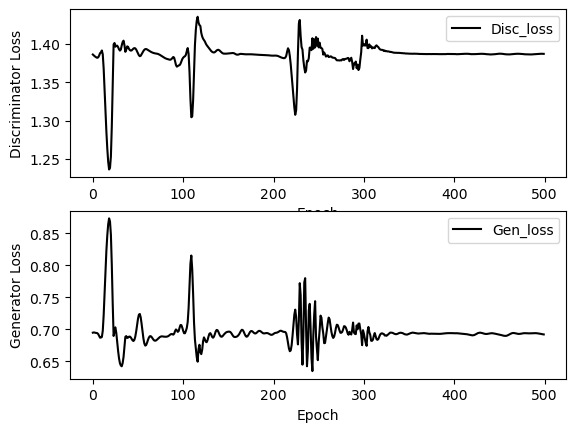

In [ ]:
predicted_price, real_price, RMSPE = train(X_train, y_train, yc_train, epochs, generator, discriminator, g_optimizer, d_optimizer)

In [ ]:
test_generator = tf.keras.models.load_model(f'./models_gan/{stock_name}/generator_V_{epochs-1}.h5')

Test RMSE:  34.74148571912353


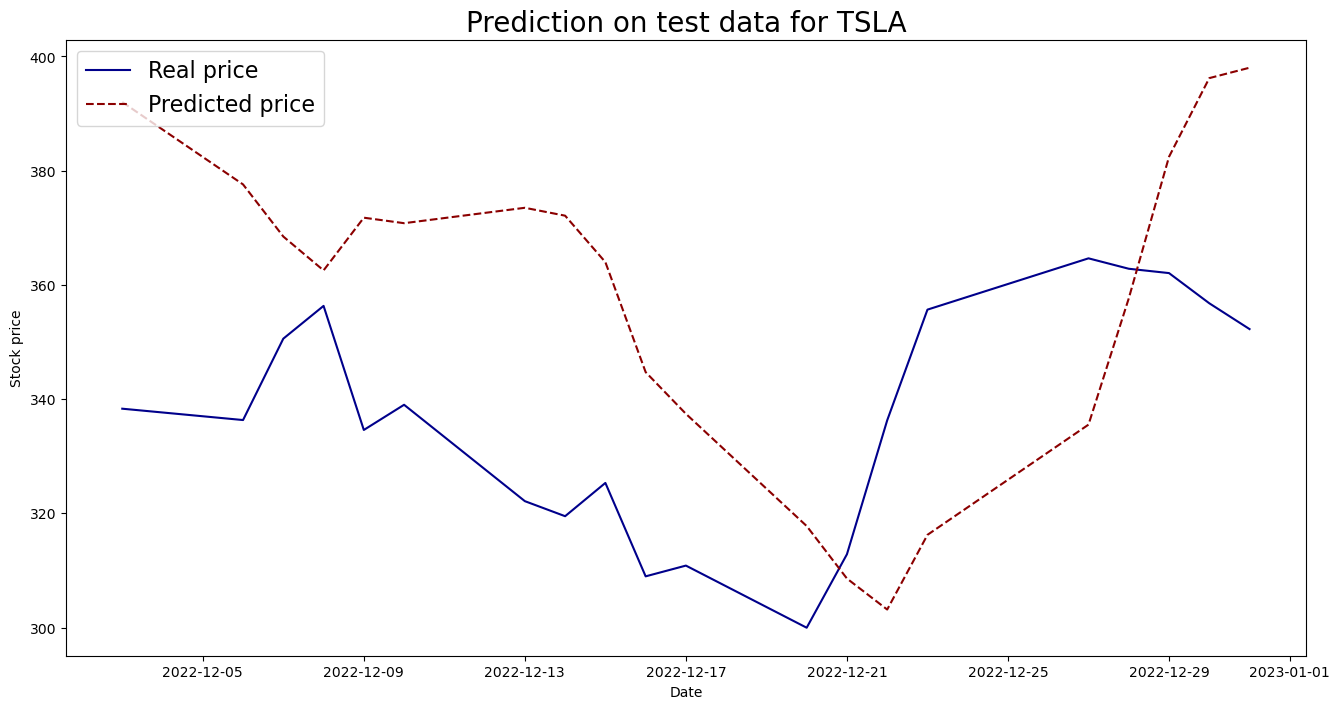

In [ ]:
predicted_test_data = eval_op(test_generator, X_test)
plot_test_data(y_test, predicted_test_data,index_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Random Forest (RF)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train.reshape(-1, X_train.shape[2]), yc_train.flatten())
rf_predictions = rf_model.predict(X_test.reshape(-1, X_test.shape[2]))
rf_rmse = np.sqrt(mean_squared_error(yc_test.flatten(), rf_predictions))
print("Random Forest RMSE:", rf_rmse)

# Decision Tree (DT)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train.reshape(-1, X_train.shape[2]), yc_train.flatten())
dt_predictions = dt_model.predict(X_test.reshape(-1, X_test.shape[2]))
dt_rmse = np.sqrt(mean_squared_error(yc_test.flatten(), dt_predictions))
print("Decision Tree RMSE:", dt_rmse)

# Support Vector Machine (SVM)
svm_model = make_pipeline(StandardScaler(), SVR())
svm_model.fit(X_train.reshape(-1, X_train.shape[2]), yc_train.flatten())
svm_predictions = svm_model.predict(X_test.reshape(-1, X_test.shape[2]))
svm_rmse = np.sqrt(mean_squared_error(yc_test.flatten(), svm_predictions))
print("SVM RMSE:", svm_rmse)

# Gradient Boosting (GB)
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train.reshape(-1, X_train.shape[2]), yc_train.flatten())
gb_predictions = gb_model.predict(X_test.reshape(-1, X_test.shape[2]))
gb_rmse = np.sqrt(mean_squared_error(yc_test.flatten(), gb_predictions))
print("Gradient Boosting RMSE:", gb_rmse)


Random Forest RMSE: 0.01757793372892389
Decision Tree RMSE: 0.06422432193729673
SVM RMSE: 0.06786111484616376
Gradient Boosting RMSE: 0.0248792598516074


In [ ]:
num_future_days = 15
num_features = 15
simulated_future_data = np.random.randn(num_future_days, num_features)  # Replace with your actual feature generation logic

# Make predictions for the simulated future data using the trained Gradient Boosting model
future_predictions = gb_model.predict(simulated_future_data.reshape(-1, simulated_future_data.shape[1]))

# Print or use the predictions for stock price forecasting
print("Gradient Boosting Future Predictions:", future_predictions)

Gradient Boosting Future Predictions: [-8.10978796e-01 -2.64430388e-01  2.00221396e-01 -3.42389882e-01
  4.35932763e-04  1.26302717e-01 -4.89174915e-01 -7.35408241e-02
 -6.20998780e-02 -1.32982831e-01 -4.63403408e-02 -2.57678027e-02
 -1.01583061e-01 -4.69110991e-01 -5.87036940e-02]


In [ ]:
# Example: Replace with the last known closing price
last_known_closing_price = 100.0

# Gradient Boosting Future Predictions
gb_future_predictions = np.array([-8.10978796e-01, -2.64430388e-01,  2.00221396e-01, -3.42389882e-01,
                                   4.35932763e-04,  1.26302717e-01, -4.89174915e-01, -7.35408241e-02,
                                  -6.20998780e-02, -1.32982831e-01, -4.63403408e-02, -2.57678027e-02,
                                  -1.01583061e-01, -4.69110991e-01, -5.87036940e-02])

# Calculate predicted closing prices
predicted_closing_prices = last_known_closing_price * np.cumprod(1 + gb_future_predictions)

# Print or use the predicted closing prices
print("Predicted Closing Prices for the Next 15 Days:")
print(predicted_closing_prices)

Predicted Closing Prices for the Next 15 Days:
[18.9021204  13.90382537 16.68766869 10.97397978 10.9787637  12.36541138
  6.31656232  5.85203712  5.48862633  4.75873326  4.53821194  4.42127219
  3.97214583  2.10876856  1.98497606]


## **Conclusions**
As we can see, GAN models can perform quite well with time series and even stock data. Moreover, using raw historical data gives quite poor predictions, but when we add technical indicators and Twitter sentiment analysis it becomes much easier for the model to make predictions.

This might not work for "less popular" stock tickers as the number of tweets about such stocks gets drastically lower than, for example, Tesla. In this case sentiment scores might fail to give the bigger picture and might even decrease model results.